Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=63

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=27 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
242                           NaN                Thailand  15.870032   
243                           NaN             Timor-Leste  -8.874217   
244                           NaN                    Togo   8.619500   
245                           NaN     Trinidad and Tobago  10.691800   
246                           NaN                 Tunisia  33.886917   
247                           NaN                  Turkey  38.963700   
248                           NaN           United States  40.000000   
249                           NaN                  Uganda   1.373333   
250                           NaN                 Ukraine  48.379400   
251                           NaN    United Arab Emirates  23.424076   
252                      Anguilla          United Kingdom  18.220600   
253                       Bermuda          United Kingdom  32.307800   
254        British Virgin Islands          United Kingdom  18.420700   
255                Cayman Islands          United Kingdom  19.313300   
256               Channel Islands          United Kingdom  49.372300   
257   Falkland Islands (Malvinas)          United Kingdom -51.796300   
258                     Gibraltar          United Kingdom  36.140800   
259                   Isle of Man          United Kingdom  54.236100   
260                    Montserrat          United Kingdom  16.742498   
261      Turks and Caicos Islands          United Kingdom  21.694000   
262                           NaN          United Kingdom  55.378100   
263                           NaN                 Uruguay -32.522800   
264                           NaN              Uzbekistan  41.377491   
265                           NaN                 Vanuatu -

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
248                           NaN                Thailand  15.870032   
249                           NaN             Timor-Leste  -8.874217   
250                           NaN                    Togo   8.619500   
251                           NaN     Trinidad and Tobago  10.691800   
252                           NaN                 Tunisia  33.886917   
253                           NaN                  Turkey  38.963700   
254                           NaN           United States  40.000000   
255                           NaN                  Uganda   1.373333   
256                           NaN                 Ukraine  48.379400   
257                           NaN    United Arab Emirates  23.424076   
258                      Anguilla          United Kingdom  18.220600   
259                       Bermuda          United Kingdom  32.307800   
260        British Virgin Islands          United Kingdom  18.420700   
261                Cayman Islands          United Kingdom  19.313300   
262               Channel Islands          United Kingdom  49.372300   
263   Falkland Islands (Malvinas)          United Kingdom -51.796300   
264                     Gibraltar          United Kingdom  36.140800   
265                   Isle of Man          United Kingdom  54.236100   
266                    Montserrat          United Kingdom  16.742498   
267      Turks and Caicos Islands          United Kingdom  21.694000   
268                           NaN          United Kingdom  55.378100   
269                           NaN                 Uruguay -32.522800   
270                           NaN              Uzbekistan  41.377491   
271                           NaN                 Vanuatu -

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN        Moldova  47.411600   28.369900        0        0   
189            NaN         Monaco  43.733300    7.416700        0        0   
190            NaN       Mongolia  46.862500  103.846700        0        0   
191            NaN     Montenegro  42.708678   19.374390        0        0   
192            NaN        Morocco  31.791700   -7.092600        0        0   
193            NaN     Mozambique -18.665695   35.529562        0        0   
194            NaN        Namibia -22.957600   18.490400        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  1/12/21  1/13/21  1/14/21  \
185        0        0        0        0  ...      392      395      396   
186        0        0        0        0  ...       10       10       10   
187        0        0        0        0  ...   135682   136917   137916   
188        0        0        0        0  ...     3176     3193     3211   
189        0        0        0        0  ...        7        7        7   
190        0        0        0        0  ...        2        2        2   
191        0        0        0        0  ...      730      737      740   
192        0        0        0        0  ...     7784     7810     7854   
193        0        0        0        0  ...      201      205      211   
194        0        0        0        0  ...      264      271      275   

     1/15/21  1/16/21  1/17/21  1/18/21  1/19/21   Population           region  
185      400      401      402      403      405     4,649,658  Mauritania_nan  
186       10       10       10       10       10           NaN   Mauritius_nan  
187   139022   140241   140704   141248   142832   128,640,794      Mexico_nan  
188     3228     3245     3250     3267     3282     4,035,942     Moldova_nan  
189        7        7        7        7        9        39,183      Monaco_nan  
190        2        2        2        2        2           NaN    Mongolia_nan  
191      741      743      745      746      749       622 500  Montenegro_nan  
192     7888     7911     7942     7977     8011    36,817,128     Morocco_nan  
193      216      234      241      249      253    31,542,919  Mozambique_nan  
194      280      280      285      293      296     2,540,905     Namibia_nan  

[10 rows x 370 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region      Lat      Long  \
175                               NaN        Morocco  31.7917   -7.0926   
176                               NaN     Mozambique -18.6657   35.5296   
177                               NaN        Namibia -22.9576   18.4904   
178                               NaN          Nepal  28.1667   84.2500   
179                             Aruba    Netherlands  12.5211  -69.9683   
180  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784  -68.2385   
181                           Curacao    Netherlands  12.1696  -68.9900   
182                      Sint Maarten    Netherlands  18.0425  -63.0548   
183                               NaN    Netherlands  52.1326    5.2913   
184                               NaN    New Zealand -40.9006  174.8860   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/12/21  \
175        0        0        0        0        0        0  ...   427351   
176        0        0        0        0        0        0  ...    18170   
177        0        0        0        0        0        0  ...    24938   
178        0        0        0        0        0        0  ...   259358   
179        0        0        0        0        0        0  ...     5511   
180        0        0        0        0        0        0  ...      180   
181        0        0        0        0        0        0  ...     4023   
182        0        0        0        0        0        0  ...     1460   
183        0        0        0        0        0        0  ...        0   
184        0        0        0        0        0        0  ...     2141   

     1/13/21  1/14/21  1/15/21  1/16/21  1/17/21  1/18/21  1/19/21  \
175   429278   431167   432576   433937   434925   435686   436626   
176    18282    18352    18371    18515    18607    18880    19132   
177    25408    25845    26254    26468    26931    27493    27858   
178   259772   260177   260567   261044   261444   261818   262259   
179     5552     5662     5757     5829     5923     5923     5959   
180      180      180      180      180      180      180      180   
181     4096     4208     4253     4286     4286     4358     4376   
182     1469     1478     1491     1491     1501     1522     1523   
183        0        0        0        0        0        0        0   
184     2141     2145     2145     2149     2152     2152     2166   

      Population                                         region  
175    36,817,128                                   Morocco_nan  
176    31,542,919                                Mozambique_nan  
177     2,540,905                                   Namibia_nan  
178    29,300,000                                     Nepal_nan  
179       116,600                             Netherlands_Aruba  
180           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
181       158,665                           Netherlands_Curacao  
182           NaN                      Netherlands_Sint Maarten  
183    17,180,000                               Netherlands_nan  
184     4,813,844                               New Zealand_nan  

[10 rows x 370 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN        Moldova  47.411600   28.369900        0        0   
189            NaN         Monaco  43.733300    7.416700        0        0   
190            NaN       Mongolia  46.862500  103.846700        0        0   
191            NaN     Montenegro  42.708678   19.374390        0        0   
192            NaN        Morocco  31.791700   -7.092600        0        0   
193            NaN     Mozambique -18.665695   35.529562        0        0   
194            NaN        Namibia -22.957600   18.490400        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  1/12/21  1/13/21  1/14/21  \
185        0        0        0        0  ...    15707    15794    15893   
186        0        0        0        0  ...      546      547      547   
187        0        0        0        0  ...  1556028  1571901  1588369   
188        0        0        0        0  ...   150138   150946   151687   
189        0        0        0        0  ...     1092     1128     1145   
190        0        0        0        0  ...     1469     1479     1491   
191        0        0        0        0  ...    53338    53840    54316   
192        0        0        0        0  ...   453789   455055   456334   
193        0        0        0        0  ...    22996    23726    24269   
194        0        0        0        0  ...    28871    29183    29570   

     1/15/21  1/16/21  1/17/21  1/18/21  1/19/21   Population           region  
185    15963    15999    16039    16081    16147     4,649,658  Mauritania_nan  
186      547      547      547      556      556           NaN   Mauritius_nan  
187  1609735  1630258  1641428  1649502  1668396   128,640,794      Mexico_nan  
188   152263   152640   152854   153112   153506     4,035,942     Moldova_nan  
189     1169     1194     1205     1212     1240        39,183      Monaco_nan  
190     1512     1517     1526     1536     1568           NaN    Mongolia_nan  
191    54730    55136    55493    55803    56228       622 500  Montenegro_nan  
192   457625   458865   459671   460144   461390    36,817,128     Morocco_nan  
193    25004    25862    26551    27446    28270    31,542,919  Mozambique_nan  
194    29889    30198    30363    30753    30995     2,540,905     Namibia_nan  

[10 rows x 370 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
221            NaN                       Saint Lucia  13.909400  -60.978900   
222            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
223            NaN                             Samoa -13.759000 -172.104600   
224            NaN                        San Marino  43.942400   12.457800   
225            NaN             Sao Tome and Principe   0.186400    6.613100   
226            NaN                      Saudi Arabia  23.885942   45.079162   
227            NaN                           Senegal  14.497400  -14.452400   
228            NaN                            Serbia  44.016500   21.005900   
229            NaN                        Seychelles  -4.679600   55.492000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/12/21  \
220        0        0        0        0        0        0  ...       34   
221        0        0        0        0        0        0  ...      490   
222        0        0        0        0        0        0  ...      284   
223        0        0        0        0        0        0  ...        2   
224        0        0        0        0        0        0  ...     2706   
225        0        0        0        0        0        0  ...     1090   
226        0        0        0        0        0        0  ...   364096   
227        0        0        0        0        0        0  ...    21685   
228        0        0        0        0        0        0  ...   363924   
229        0        0        0        0        0        0  ...      601   

     1/13/21  1/14/21  1/15/21  1/16/21  1/17/21  1/18/21  1/19/21  \
220       34       34       34       34       34       35       35   
221      502      543      576      611      611      621      656   
222      284      340      450      450      478      494      602   
223        2        2        2        2        2        2        2   
224     2723     2737     2767     2778     2778     2787     2803   
225     1105     1119     1125     1130     1142     1142     1151   
226   364271   364440   364613   364753   364929   365099   365325   
227    21883    22178    22396    22738    23028    23224    23392   
228   366191   368072   369823   371216   372533   374111   375799   
229      612      627      656      696      705      746      746   

      Population                                 region  
220           NaN             Saint Kitts and Nevis_nan  
221           NaN                       Saint Lucia_nan  
222       110,940  Saint Vincent and the Grenadines_nan  
223           NaN                             Samoa_nan  
224        33,916                        San Marino_nan  
225           NaN             Sao Tome and Principe_nan  
226    34,695,447                      Saudi Arabia_nan  
227    16,743,927                           Senegal_nan  
228     8,744,671                            Serbia_nan  
229        98,676                        Seychelles_nan  

[10 rows x 370 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

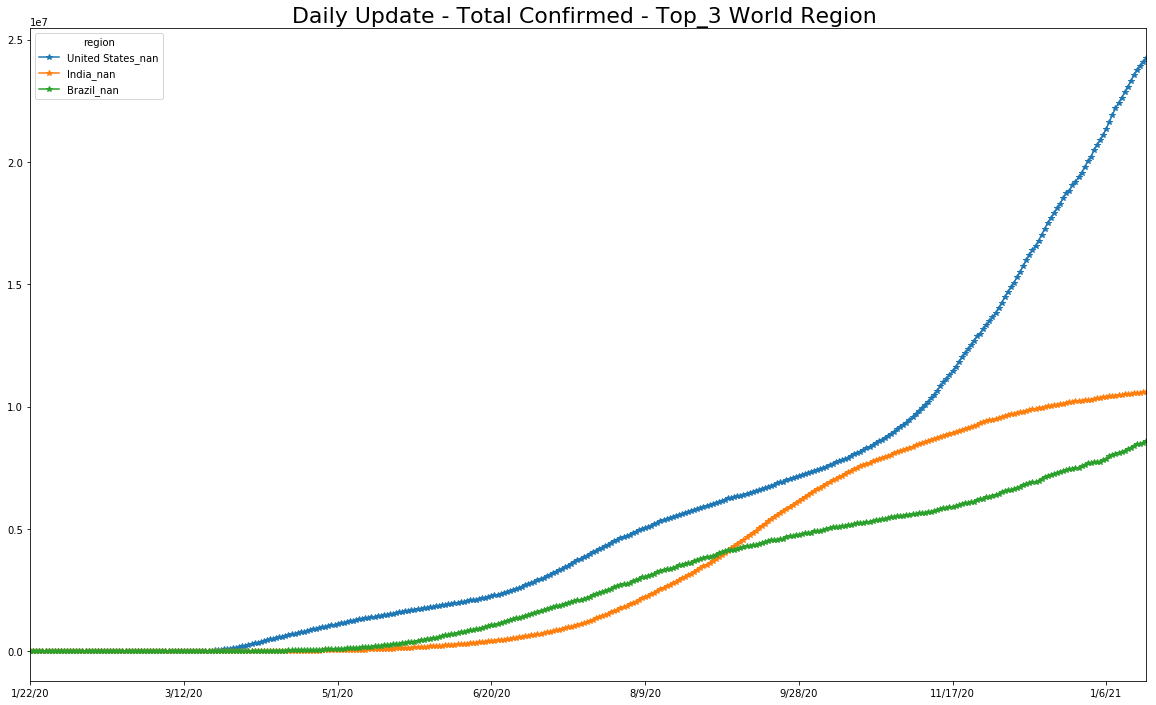

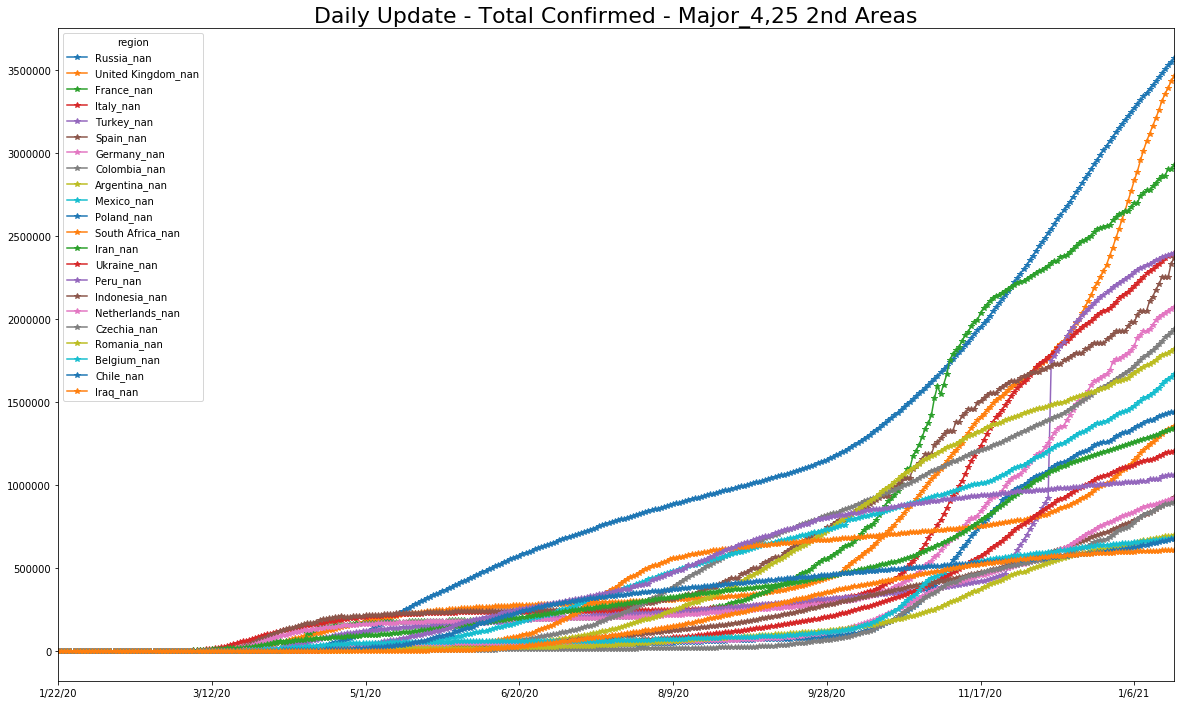

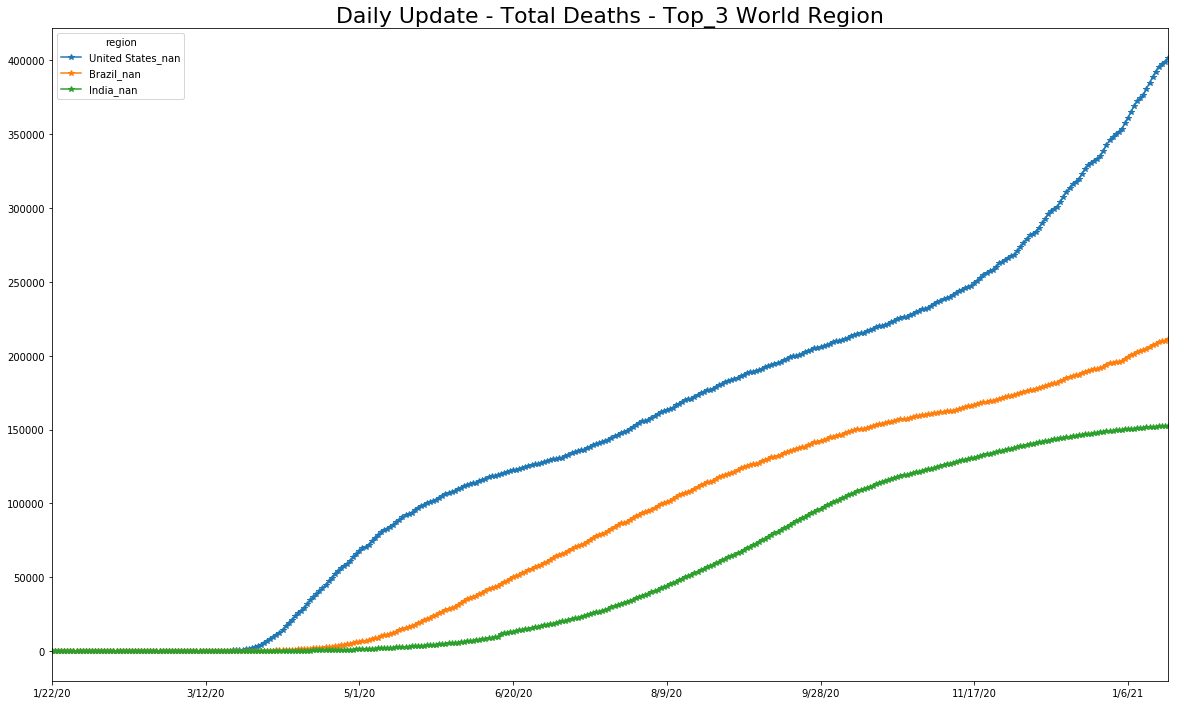

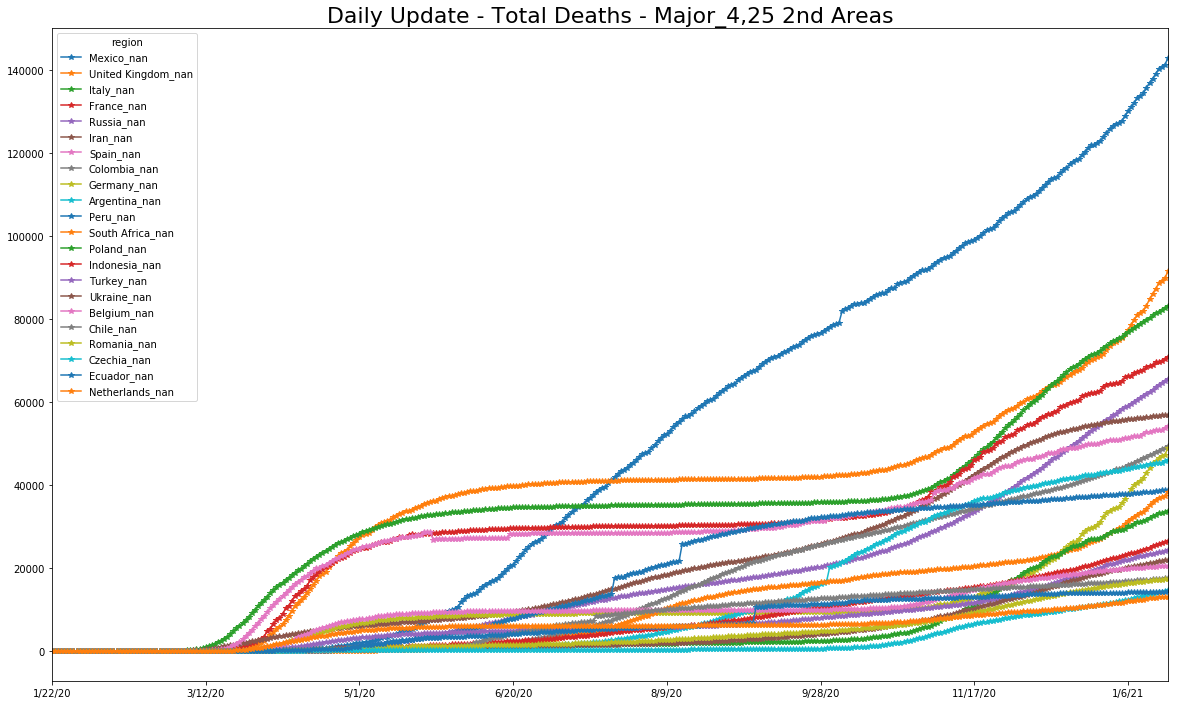

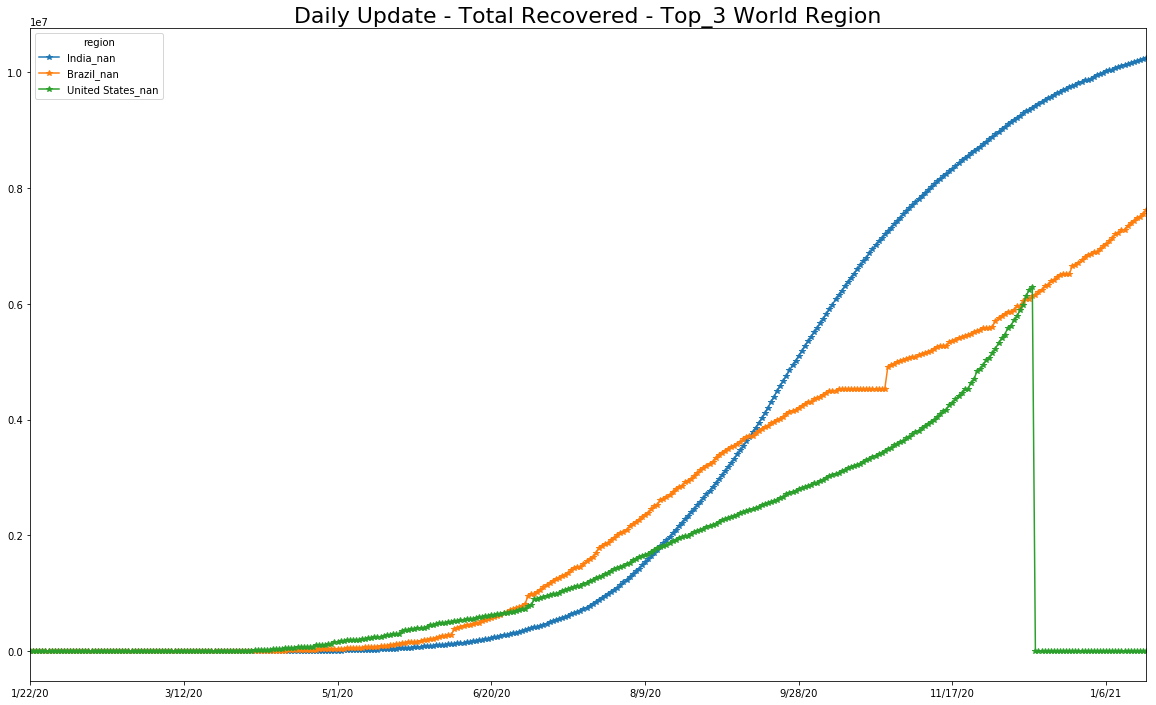

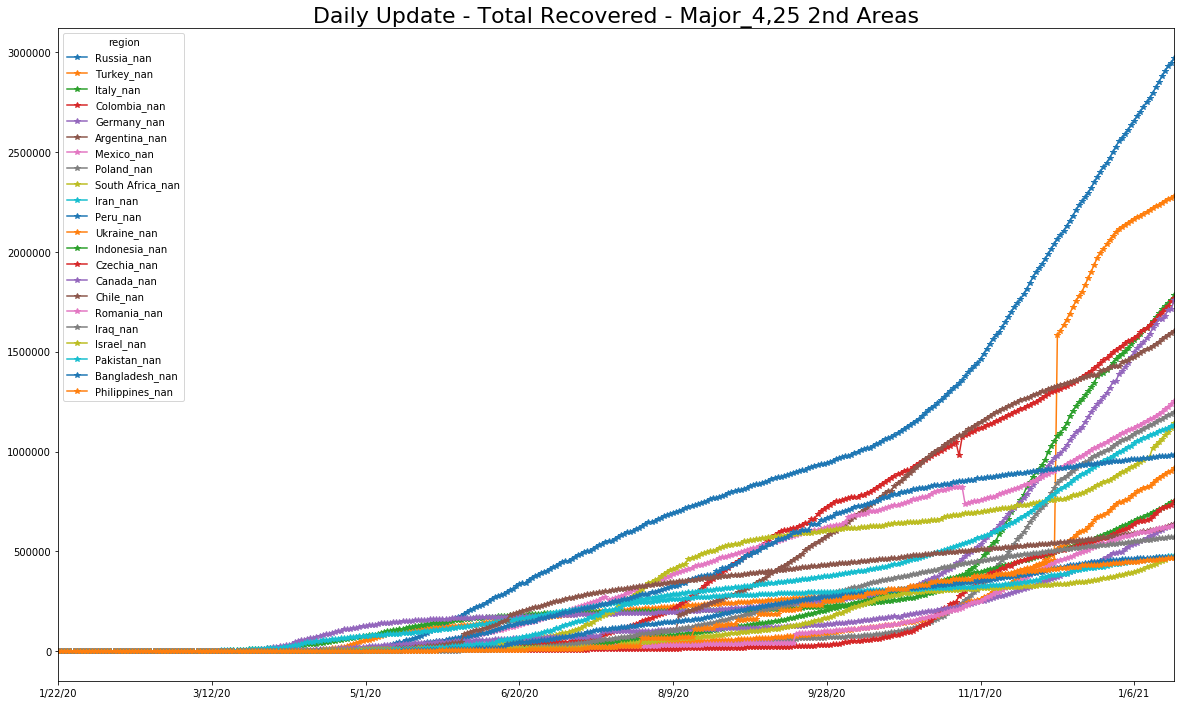

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/01/20


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6518685         1808           47287            0   
9/14/20  ...            6552844         1812           47836            0   
9/15/20  ...            6592244         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 272 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
1/16/21            53938        67216       103611         9038       18765   
1/17/21            53984        67690       103833         9083       18875   
1/18/21            54062        67982       104092         9083       18926   
1/19/21            54141        68568       104341         9194       19011   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
1/16/21                      187        1791979       164235   
1/17/21                      189        1799243       164586   
1/18/21                      189        1807428       164676   
1/19/21                      190        1819569       164912   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
1/16/21                                     118                       5066   
1/17/21                                     118                       5074   
1/18/21                                     118                       5076   
1/19/21                                     118                       5079   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
1/16/21  ...           23758855        31669           77968            1   
1/17/21  ...           23936773        32378           77968            1   
1/18/21  ...           24078772        32863           78036            1   
1/19/21  ...           24246830        33446           78091            1   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
1/16/21         119306         1537                  151569       2112   
1/17/21         119803         1537                  152031       2112   
1/18/21         120444         1539                  152555       2113   
1/19/21         121117         1540                  153093       2115   

region   Zambia_nan  Zimbabwe_nan  
1/16/21       36074         26881  
1/17/21       37605         27203  
1/18/21       38207         27892  
1/19/21       39515         28675  

[4 rows x 272 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
36110 2020-12-22     Zimbabwe_nan      12544            97           375   
36111 2020-12-23     Zimbabwe_nan      12656           122           393   
36112 2020-12-24     Zimbabwe_nan      12786           112           331   
36113 2020-12-25     Zimbabwe_nan      12880           130           364   
36114 2020-12-26     Zimbabwe_nan      12963            94           336   
36115 2020-12-27     Zimbabwe_nan      13077            83           307   
36116 2020-12-28     Zimbabwe_nan      13148           114           291   
36117 2020-12-29     Zimbabwe_nan      13325            71           268   
36118 2020-12-30     Zimbabwe_nan      13625           177           362   
36119 2020-12-31     Zimbabwe_nan      13867           300           548   
36120 2021-01-01     Zimbabwe_nan      14084           242           719   
36121 2021-01-02     Zimbabwe_nan      14491           217           759   
36122 2021-01-03     Zimbabwe_nan      15265           407           866   
36123 2021-01-04     Zimbabwe_nan      15829           774          1398   
36124 2021-01-05     Zimbabwe_nan      17194           564          1745   
36125 2021-01-06     Zimbabwe_nan      17804          1365          2703   
36126 2021-01-07     Zimbabwe_nan      18675           610          2539   
36127 2021-01-08     Zimbabwe_nan      19660           871          2846   
36128 2021-01-09     Zimbabwe_nan      20499           985          2466   
36129 2021-01-10     Zimbabwe_nan      21477           839          2695   
36130 2021-01-11     Zimbabwe_nan      22297           978  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
36139 2021-01-20  Zimbabwe_nan          0           783          1794   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
36139          5436         102.807292         106.673896         123.391755   

       last_day  kalman_prediction  population  infected_rate  min  max  
36139     28675            29500.0    14862924       0.000019  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
36139 2021-01-20  Zimbabwe_nan          0           783          1794   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
36139          5436         102.807292         106.673896         123.391755   

       last_day  kalman_prediction  population  infected_rate  min  max  
36139     28675            29500.0    14862924       0.000019  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
35357  2021-01-18  Zimbabwe_nan      27892           322          1835   
35358  2021-01-19  Zimbabwe_nan      28675           689          1783   
35359  2021-01-20  Zimbabwe_nan          0           783          1794   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
35357          5726         101.197909         107.233562         126.661126   
35358          5595         102.532846         106.829101         125.093107   
35359          5436         102.807292         106.673896         123.391755   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
35357                27203  ...    14862924       0.000018  NaN  NaN   
35358                27892  ...    14862924       0.000019  NaN  NaN   
35359                28675  ...    14862924       0.000019  NaN  NaN   

       population_percentage : infected_rate confirmed  \
35357                                         0.001830   
35358                                         0.001877   
35359                                         0.001929   

       population_percentage : factor 9/10 infected_rate confirmed  \
35357                                           0.016473             
35358                                           0.016890             
35359                                           0.017364             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
35357                  1202.0                          80.872377   
35358                  1010.0                          67.954327   
35359                   825.0                          55.507247   

       delta : roling 7day AVG  \
35357               818.000000   
35358               799.285714   
35359               776.571429   

       delta : aprox 14-day case notification rate per 100k hab  
35357                                          77.050788         
35358                                          75.288012         
35359                                          73.148460         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
262  United States_nan  4.656713e+12  2.157942e+06  226292.023256


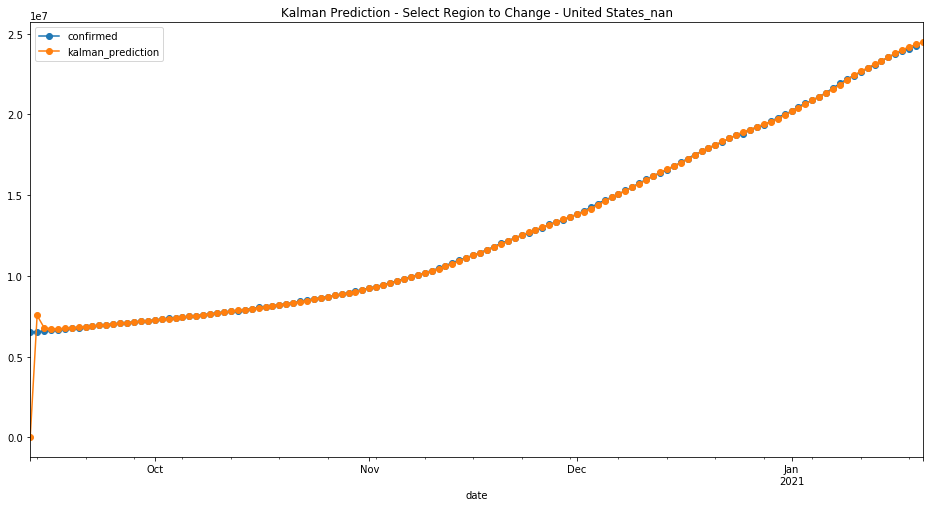

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
212  Russia_nan  1.006114e+11  317193.062577  31448.093023


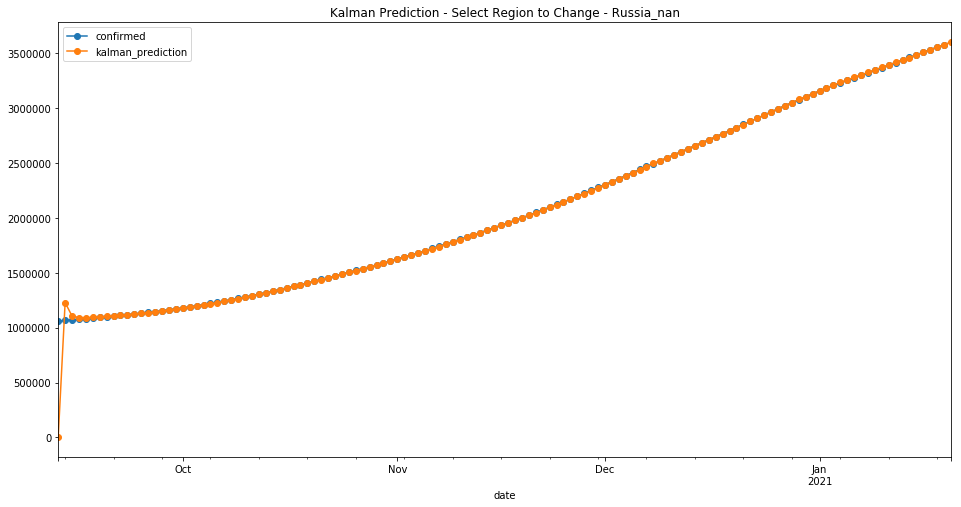

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  5.814183e+11  762507.877933  89974.356589


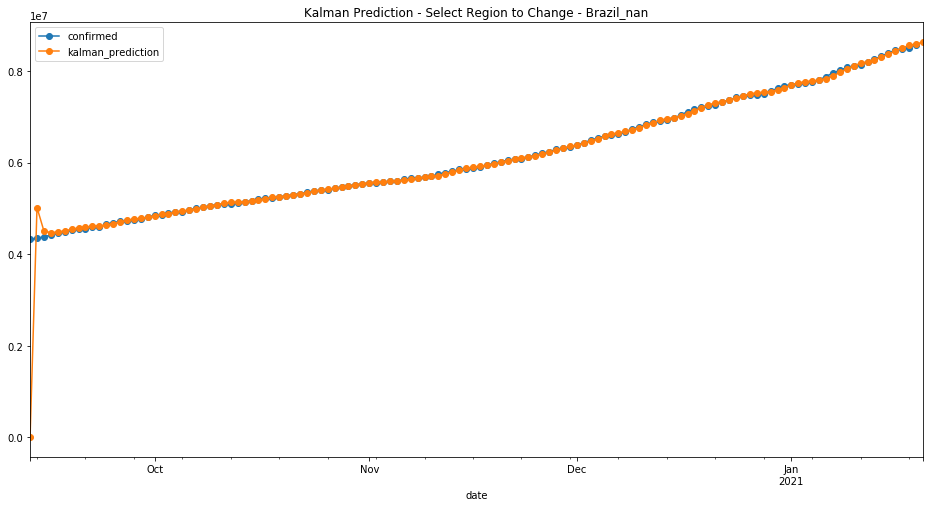

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
261  United Kingdom_nan  9.604575e+10  309912.483906  33723.503876


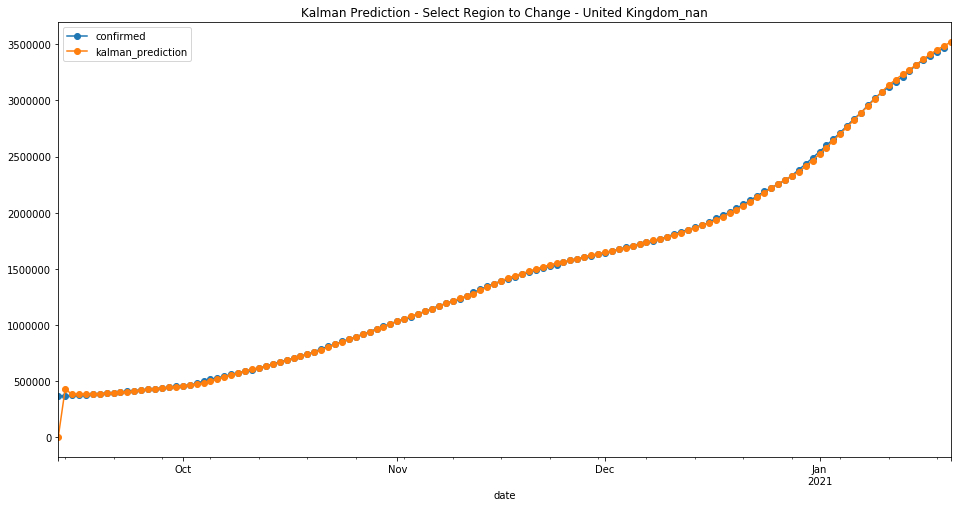

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq9vjpvam
  JVM stdout: /tmp/tmpq9vjpvam/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq9vjpvam/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    3 months and 22 days !!!
H2O_cluster_name:           H2O_from_python_unknownUser_bc29g9
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.541 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-12-24
last_train_date= 2021-01-19
first_bootstrap_date= 2021-01-11
boost_bootstrap_date= 2021-01-16
first_test_date= 2021-01-10
last_test_date= 2021-01-20
first_valid_date= 2021-01-18


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    53920.0      53538 2021-01-11  Afghanistan_nan
1    53992.0      53584 2021-01-12  Afghanistan_nan
2    53990.0      53584 2021-01-13  Afghanistan_nan
3    53956.0      53775 2021-01-14  Afghanistan_nan
4    54045.0      53831 2021-01-15  Afghanistan_nan
5    54120.0      53938 2021-01-16  Afghanistan_nan
6    54220.0      53984 2021-01-17  Afghanistan_nan
7    54282.0      54062 2021-01-18  Afghanistan_nan
8    54357.0      54141 2021-01-19  Afghanistan_nan
9    54431.0          0 2021-01-20  Afghanistan_nan
10   64199.0      63971 2021-01-11      Albania_nan
11   64644.0      64627 2021-01-12      Albania_nan
12   65230.0      65334 2021-01-13      Albania_nan
13   65894.0      65994 2021-01-14      Albania_nan
14   66576.0      66635 2021-01-15      Albania_nan
15   67237.0      67216 2021-01-16      Albania_nan
16   67846.0      67690 2021-01-17      Albania_nan
17   68355.0      67982 2021-01-18      Albania_nan
18   68674.0      68568 2021-01-19      Albania_nan
19   69158.0          0 2021-01-20      Albania_nan
20  102564.0     102369 2021-01-11      Algeria_nan
21  102792.0     102641 2021-01-12      Algeria_nan
22  103056.0     102860 2021-01-13      Algeria_nan
23  103278.0     103127 2021-01-14      Algeria_nan
24  103543.0     103381 2021-01-15      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  227047.0     226951 2021-01-16  Azerbaijan_nan
176  227424.0     227273 2021-01-17  Azerbaijan_nan
177  227720.0     227391 2021-01-18  Azerbaijan_nan
178  227802.0     227696 2021-01-19  Azerbaijan_nan
179  228093.0          0 2021-01-20  Azerbaijan_nan
180    8188.0       8004 2021-01-11     Bahamas_nan
181    8111.0       8004 2021-01-12     Bahamas_nan
182    8224.0       8011 2021-01-13     Bahamas_nan
183    8212.0       8011 2021-01-14     Bahamas_nan
184    8226.0       8021 2021-01-15     Bahamas_nan
185    8205.0       8032 2021-01-16     Bahamas_nan
186    8212.0       8032 2021-01-17     Bahamas_nan
187    8247.0       8067 2021-01-18     Bahamas_nan
188    8173.0       8068 2021-01-19     Bahamas_nan
189    8282.0          0 2021-01-20     Bahamas_nan
190   95780.0      95879 2021-01-11     Bahrain_nan
191   96093.0      96195 2021-01-12     Bahrain_nan
192   96399.0      96470 2021-01-13     Bahrain_nan
193   96679.0      96812 2021-01-14     Bahrain_nan
194   97013.0      97020 2021-01-15     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  213888.0     213993 2021-01-11  Belarus_nan
221  215688.0     215724 2021-01-12  Belarus_nan
222  217405.0     217696 2021-01-13  Belarus_nan
223  219393.0     219663 2021-01-14  Belarus_nan
224  221359.0     221604 2021-01-15  Belarus_nan
225  223334.0     223537 2021-01-16  Belarus_nan
226  225301.0     225461 2021-01-17  Belarus_nan
227  227257.0     227360 2021-01-18  Belarus_nan
228  229178.0     228716 2021-01-19  Belarus_nan
229  230536.0          0 2021-01-20  Belarus_nan
230  666036.0     665223 2021-01-11  Belgium_nan
231  666988.0     667322 2021-01-12  Belgium_nan
232  669145.0     670249 2021-01-13  Belgium_nan
233  671986.0     672886 2021-01-14  Belgium_nan
234  674583.0     675089 2021-01-15  Belgium_nan
235  676871.0     677209 2021-01-16  Belgium_nan
236  679129.0     678839 2021-01-17  Belgium_nan
237  680773.0     679771 2021-01-18  Belgium_nan
238  681621.0     681250 2021-01-19  Belgium_nan
239  683079.0          0 2021-01-20  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  8098749680.345274
# MSE on the validation data =  7071003854529.893
# R^2 on the training data =  0.9990696878539043
# R^2 on the validation data =  0.4665749735302259


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1611126096863_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           16938015.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0      22.882      2386.0      2761.0     2649.886



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 8098749680.345274
RMSE: 89993.05351161984
MAE: 8422.919787987952
RMSLE: 0.2358937499885182
Mean Residual Deviance: 8098749680.345274

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 7071003854529.893
RMSE: 2659135.9225375997
MAE: 669130.6685095676
RMSLE: 7.407991004448567
Mean Residual Deviance: 7071003854529.893

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2021-01-20 07:01:46   0.096 sec              0.0            NaN   
1     2021-01-20 07:01:46   0.552 sec              1.0  179131.200283   
2     2021-01-20 07:01:46   0.827 sec              2.0  130248.417525   
3     2021-01-20 07:01:47   1.201 sec              3.0  142473.064601   
4     2021-01-20 07:01:47   1.364 sec              4.0  152099.734421   
5     2021-01-20 07:01:47   1.450 sec              5.0  147450.474710   
6     2021-01-20 07:01:47   1.523 sec              6.0  144076.008839   
7     2021-01-20 07:01:47   1.605 sec              7.0  131741.922459   
8     2021-01-20 07:01:47   1.681 sec              8.0  114956.863648   
9     2021-01-20 07:01:47   1.758 sec              9.0  120461.991375   
10    2021-01-20 07:01:47   1.841 sec             10.0  114527.291695   
11    2021-01-20 07:01:47   1.938 sec             11.0  112404.328561   
12    2021-01-20 07:01:48   2.027 sec             12.0  105495.869726   
13    2021-01-20 07:01:48   2.114 sec             13.0  102722.542896   
14    2021-01-20 07:01:48   2.228 sec             14.0  105934.715548   
15    2021-01-20 07:01:48   2.315 sec             15.0  110057.817187   
16    2021-01-20 07:01:48   2.400 sec             16.0  110891.090359   
17    2021-01-20 07:01:48   2.486 sec             17.0  106632.669029   
18    2021-01-20 07:01:48   2.574 sec             18.0  103684.603372   
19    2021-01-20 07:01:48   2.659 sec             19.0  101832.713232   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1   25791.694249       3.208799e+10     2.735379e+06   670704.660403   
2   20441.944645       1.696465e+10     2.733499e+06   669718.442604   
3   21543.692772       2.029857e+10     2.730050e+06   669390.757148   
4   21257.141524       2.313433e+10     2.638920e+06   670770.668192   
5   20687.632910       2.174164e+10     2.689216e+06   680706.084177   
6   20697.221255       2.075790e+10     2.696195e+06   678876.609588   
7   19176.584615       1.735593e+10     2.702664e+06   677850.325411   
8   17670.497140       1.321508e+10     2.678714e+06   676937.952294   
9   17741.065740       1.451109e+10     2.683969e+06   676151.878297   
10  17029.741152       1.311650e+10     2.688803e+06   675612.380942   
11  16511.991984       1.263473e+10     2.692352e+06   674964.628182   
12  15713.666480       1.112938e+10     2.695027e+06   674354.886641   
13  15271.543928       1.055192e+10     2.698128e+06   673924.260362   
14  15142.320095       1.122216e+10     2.700567e+06   673770.917099   
15  14837.554719       1.211272e+10     2.702124e+06   673403.702219   
16  15140.393802       1.229683e+10     2.704122e+06   673063.797821   
17  14655.762006       1.137053e+10     2.705268e+06   672549.596934   
18  14144.336433       1.075050e+10     2.706791e+06   672709.267762   
19  14065.972855       1.036990e+10     2.708167e+06   672757.562161   

    validation_deviance  
0                   NaN  
1          7.482296e+12  
2          7.472015e+12  
3          7.453171e+12  
4          6.963899e+12  
5          7.231882e+12  
6          7.269467e+12  
7          7.304394e+12  
8          7.175509e+12  
9          7.203692e+12  
10         7.229663e+12  
11         7.248758e+12  
12         7.263173e+12  
13         7.279896e+12  
14         7.293064e+12  
15         7.301476e+12  
16         7.312273e+12  
17         7.318476e+12  
18         7.326716e+12  
19         7.334169e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         6.788639e+18           1.000000    0.336070
1            last_day         5.388180e+18           0.793705    0.266741
2              region         3.485190e+18           0.513386    0.172534
3        7_day_change         1.955954e+18           0.288122    0.096829
4        1_day_change         9.004143e+17           0.132635    0.044575
5        3_day_change         7.195747e+17           0.105997    0.035622
6       infected_rate         6.290786e+17           0.092666    0.031142
7                 max         1.771619e+17           0.026097    0.008770
8                 min         9.584478e+16           0.014118    0.004745
9   7_day_change_rate         3.246969e+16           0.004783    0.001607
10  3_day_change_rate         1.524150e+16           0.002245    0.000755
11  1_day_change_rate         1.231637e+16           0.001814    0.000610

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         6.788639e+18           1.000000    0.336070
1            last_day         5.388180e+18           0.793705    0.266741
2              region         3.485190e+18           0.513386    0.172534
3        7_day_change         1.955954e+18           0.288122    0.096829
4        1_day_change         9.004143e+17           0.132635    0.044575
5        3_day_change         7.195747e+17           0.105997    0.035622
6       infected_rate         6.290786e+17           0.092666    0.031142
7                 max         1.771619e+17           0.026097    0.008770
8                 min         9.584478e+16           0.014118    0.004745
9   7_day_change_rate         3.246969e+16           0.004783    0.001607
10  3_day_change_rate         1.524150e+16           0.002245    0.000755
11  1_day_change_rate         1.231637e+16           0.001814    0.000610

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


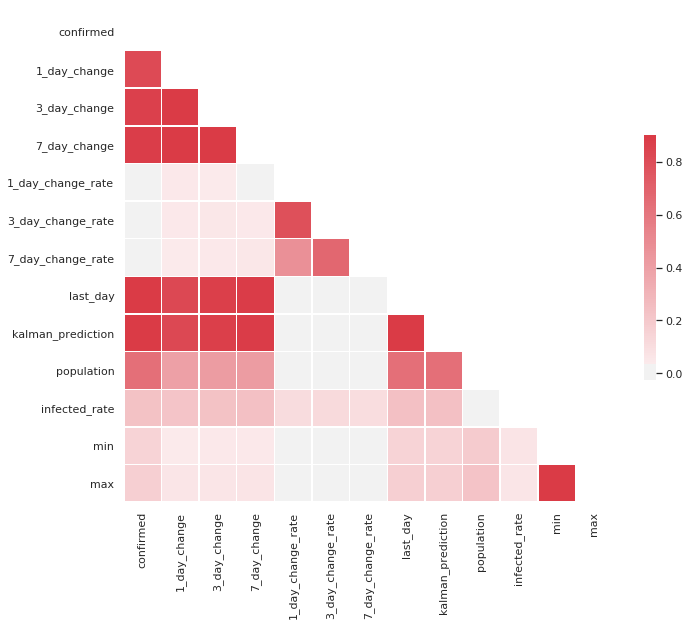

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.817868
3_day_change         0.868450
7_day_change         0.882818
1_day_change_rate    0.025440
3_day_change_rate    0.026250
7_day_change_rate    0.021345
last_day             0.987737
kalman_prediction    0.988821
population           0.636018
infected_rate        0.238087
min                  0.149337
max                  0.171765
Name: confirmed, dtype: float64


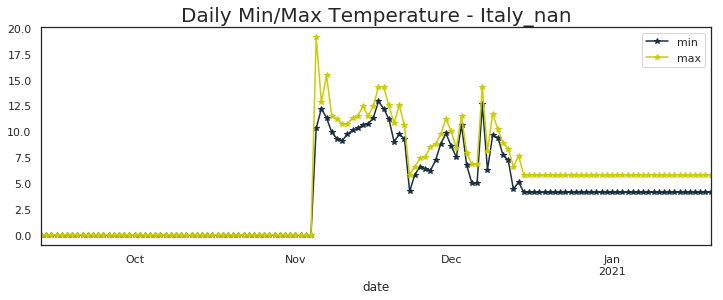

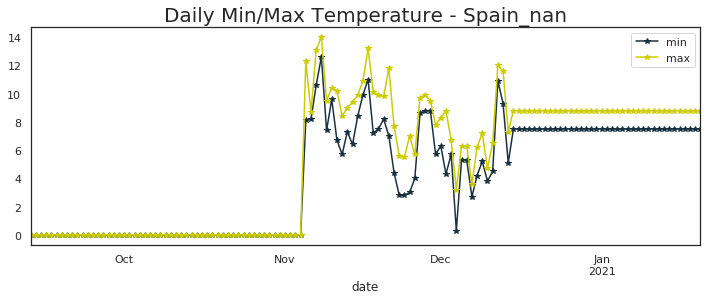

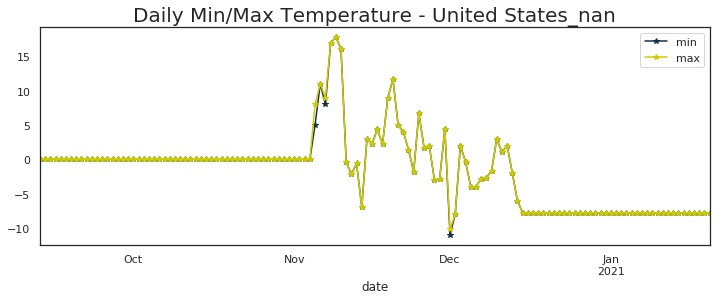

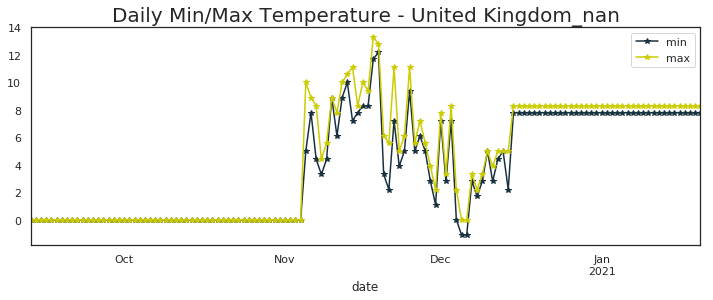

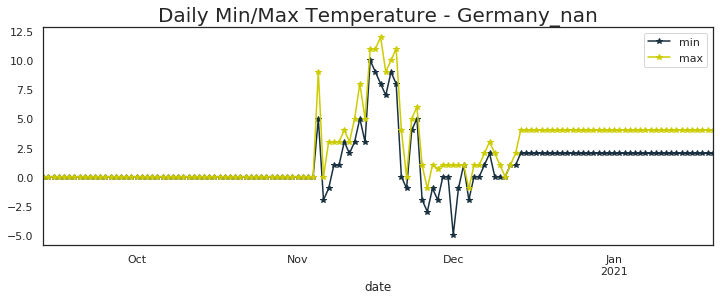

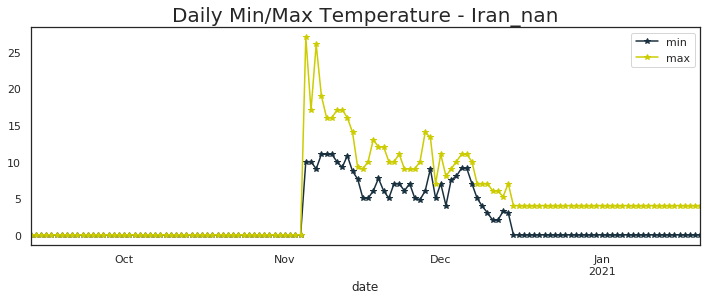

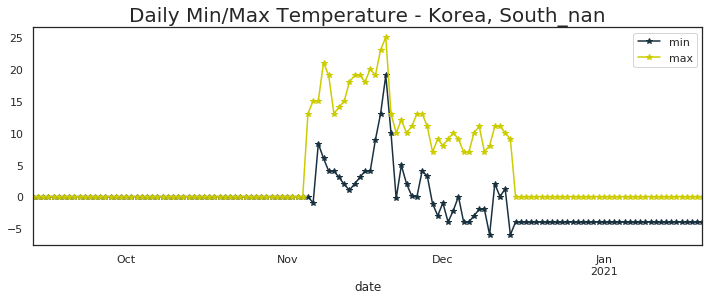

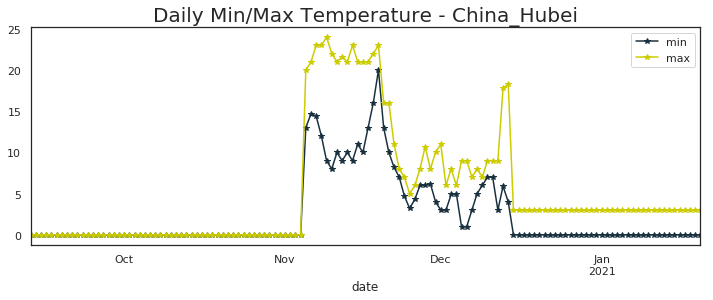

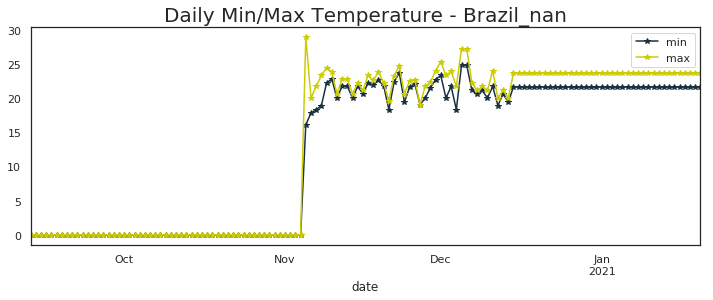

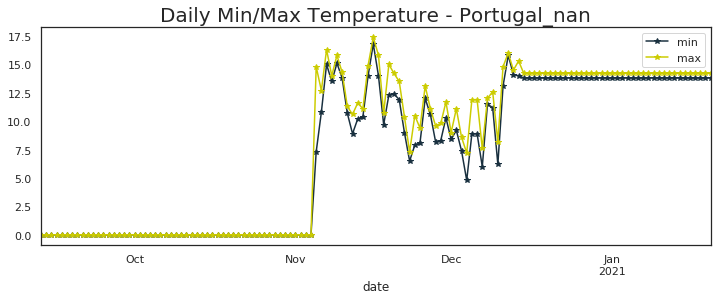

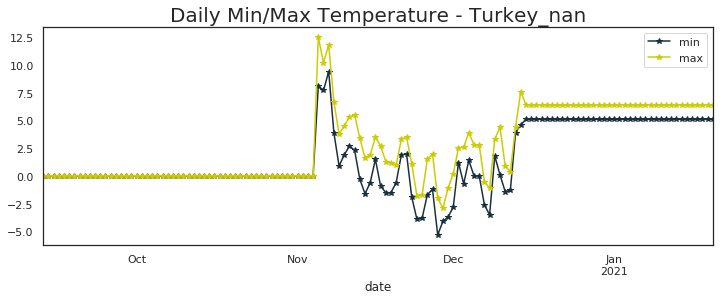

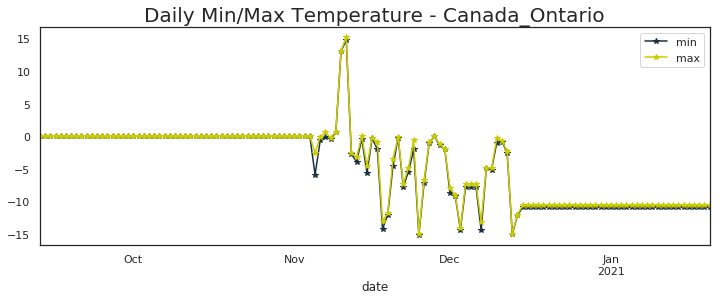

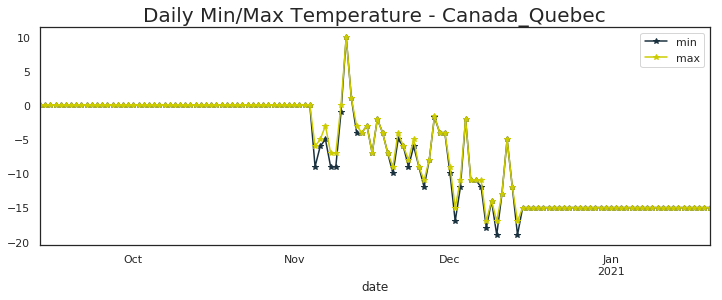

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
France_nan                  12.1  13.3
Italy_nan                   12.9  19.1
Turkey_nan                   9.4  12.5
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
South Africa_nan             0.0   0.0
Iran_nan                    11.0  27.0
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Netherlands_nan             14.4  16.1
Czechia_nan                  0.0   0.0
Romania_nan                  0.0   0.0
Belgium_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

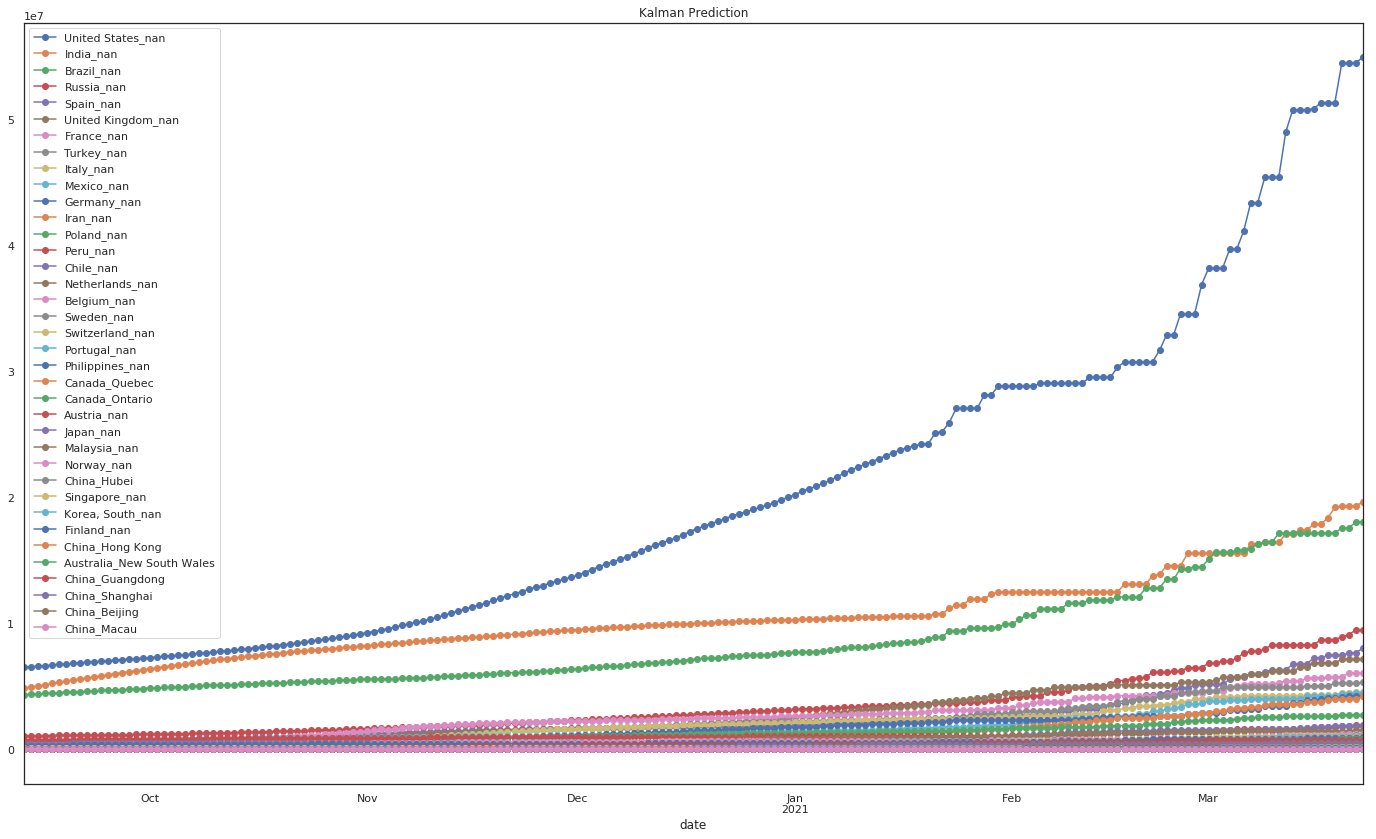

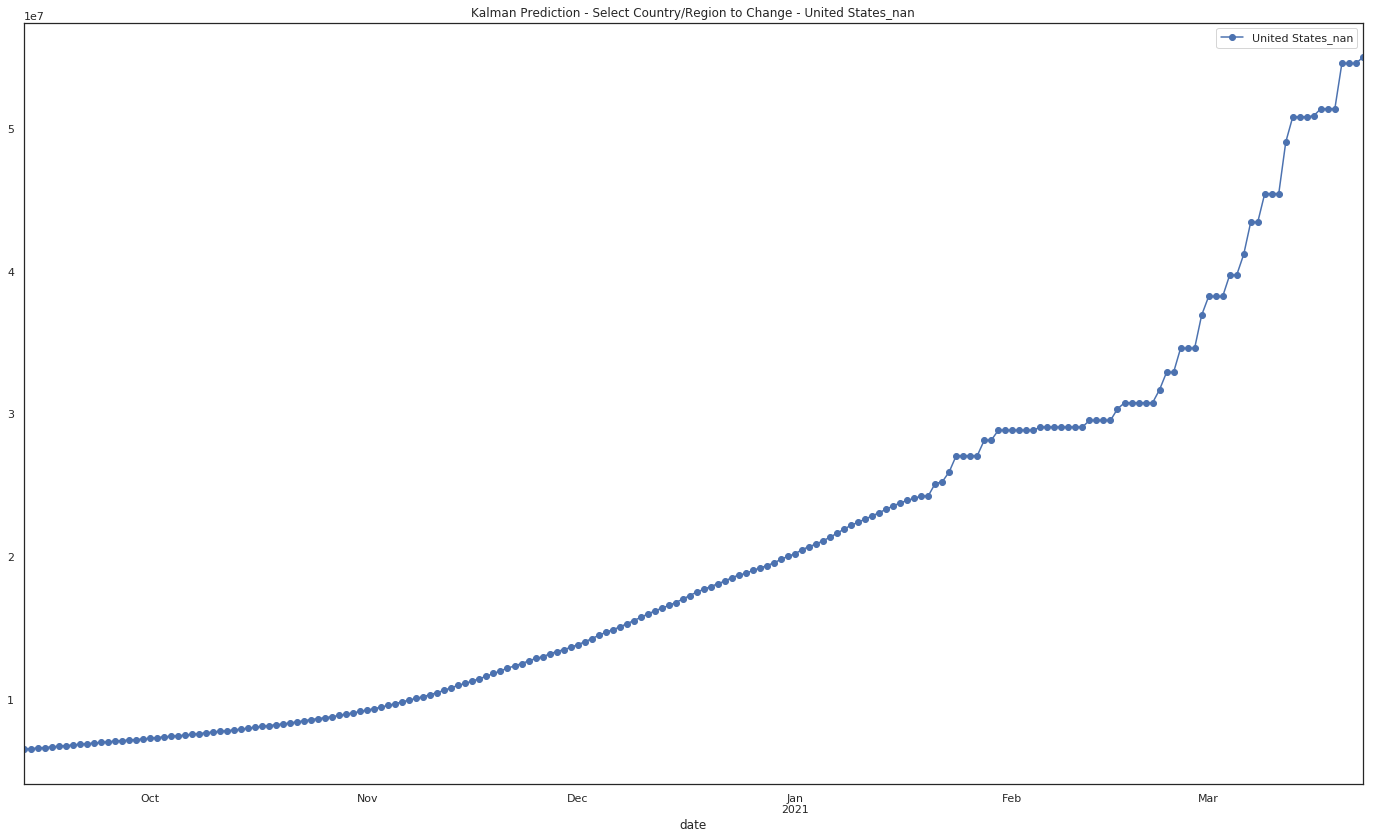

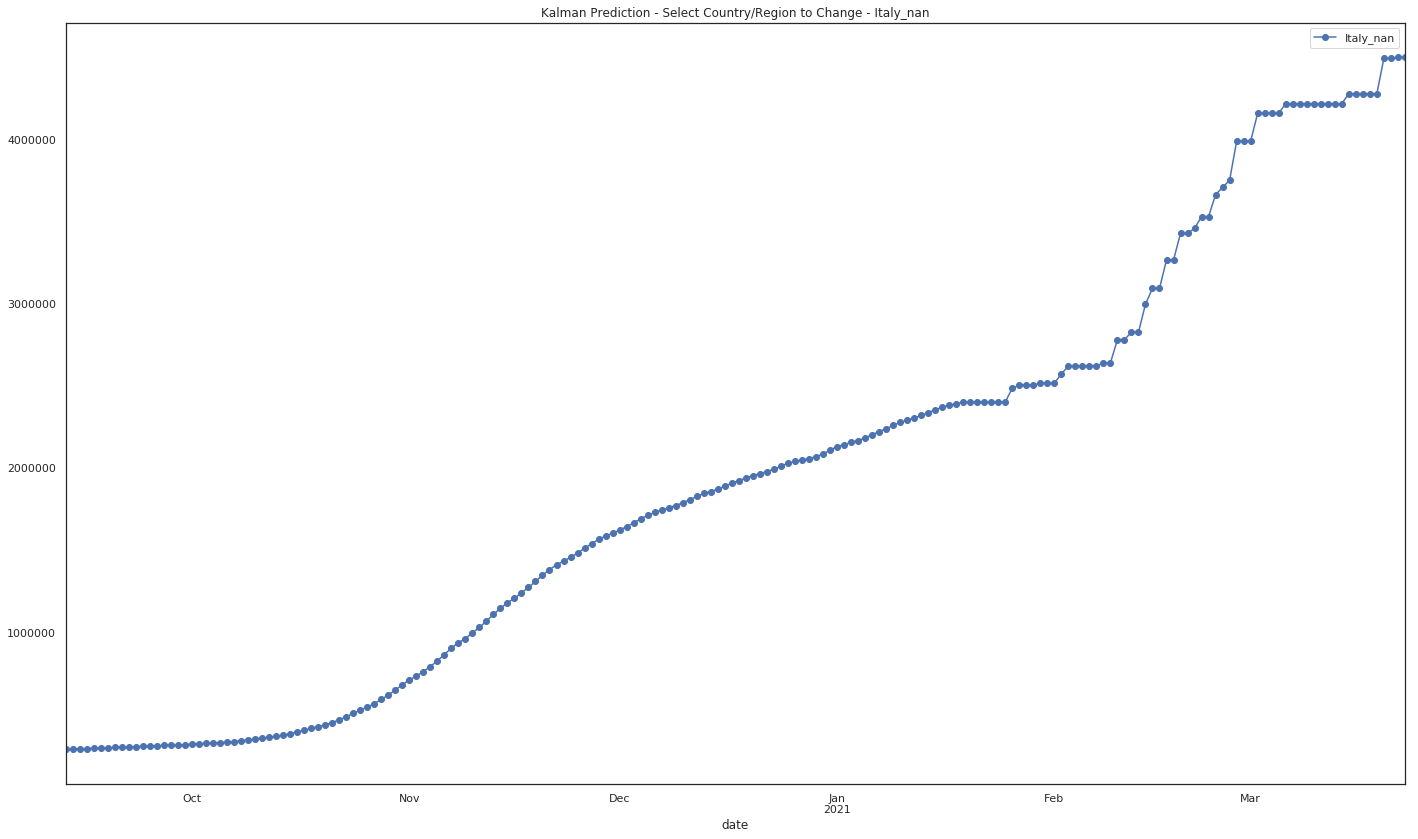

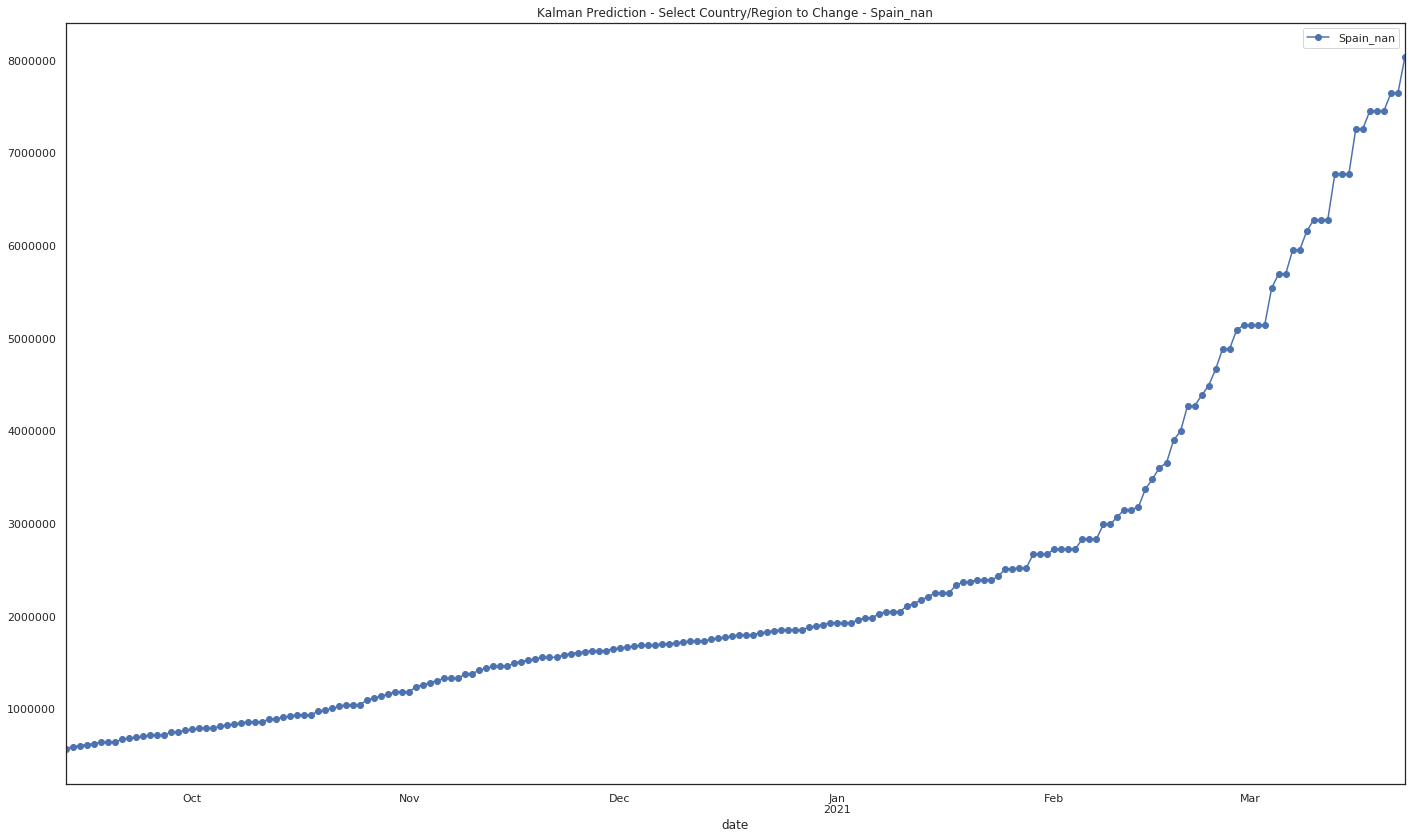

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


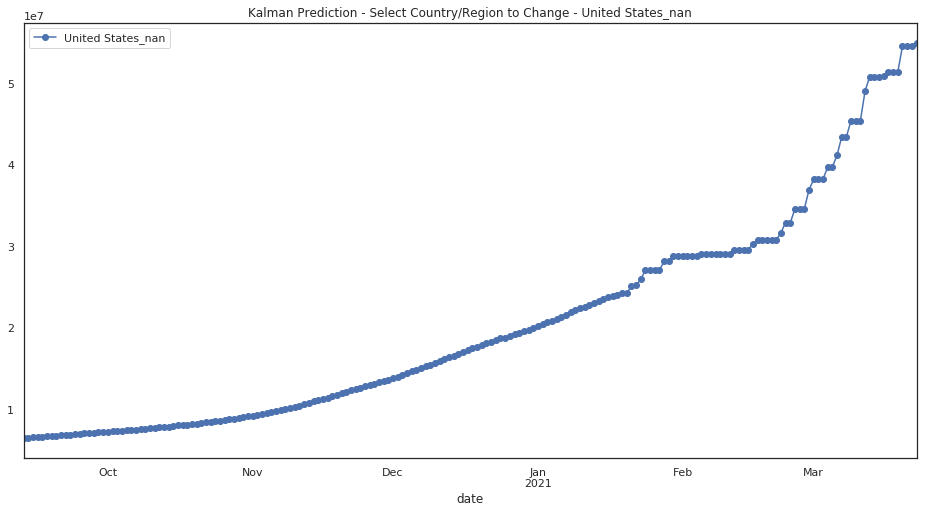

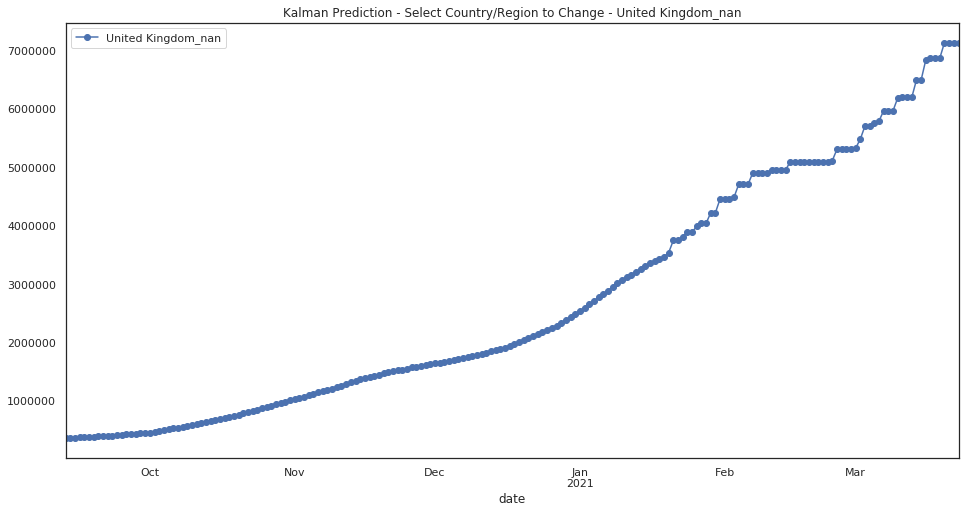

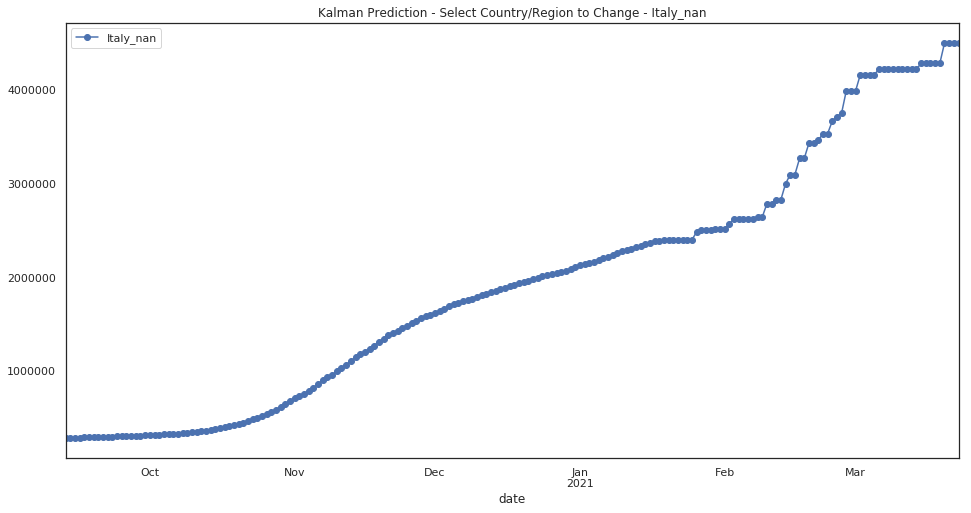

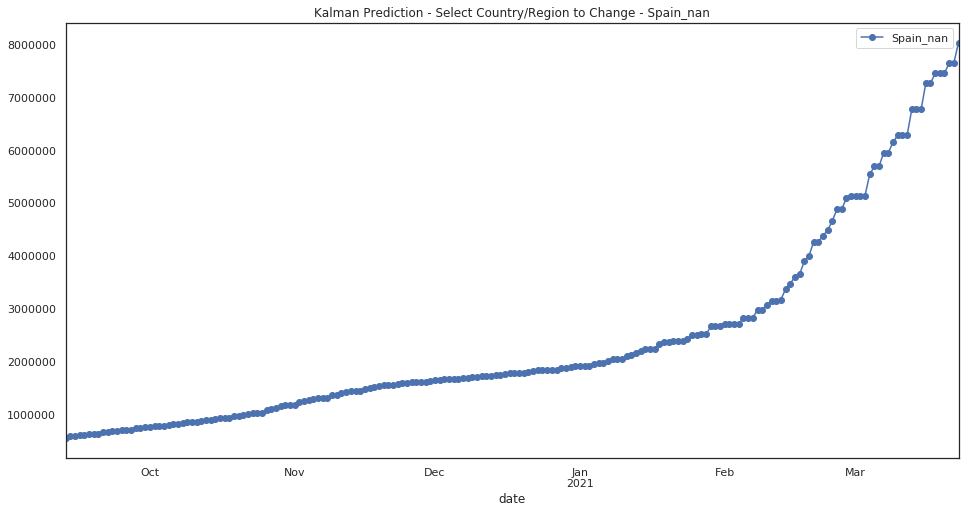

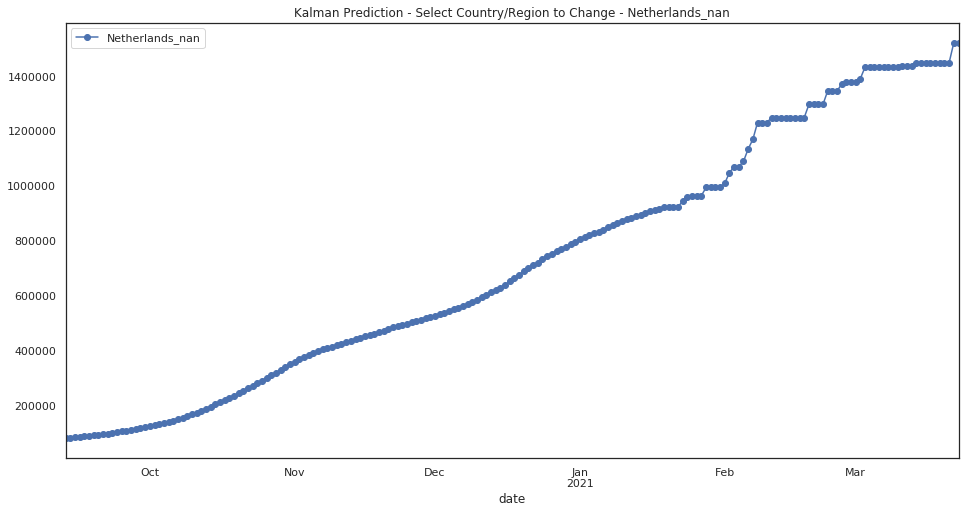

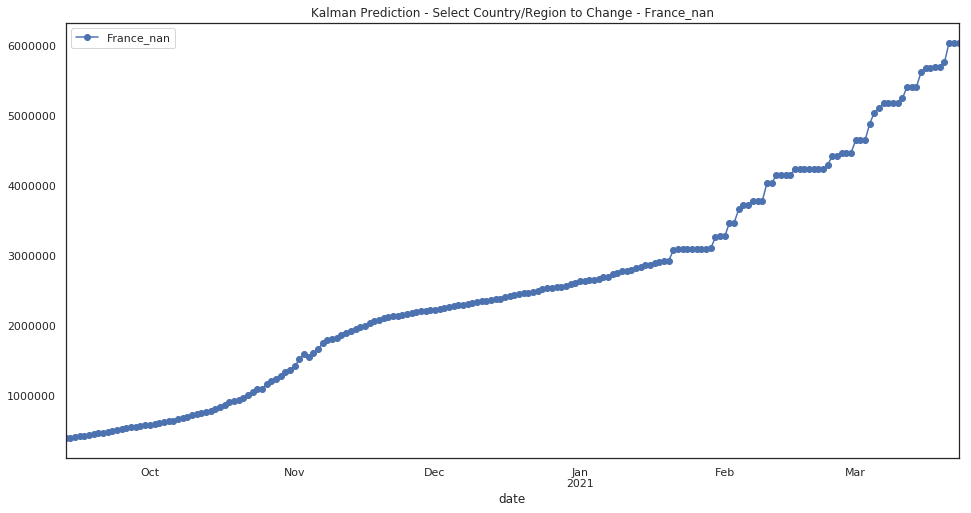

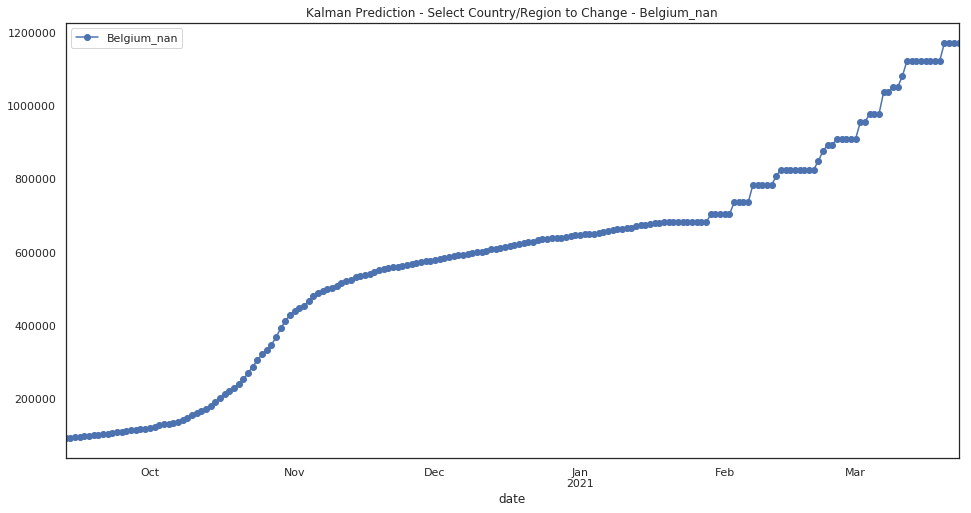

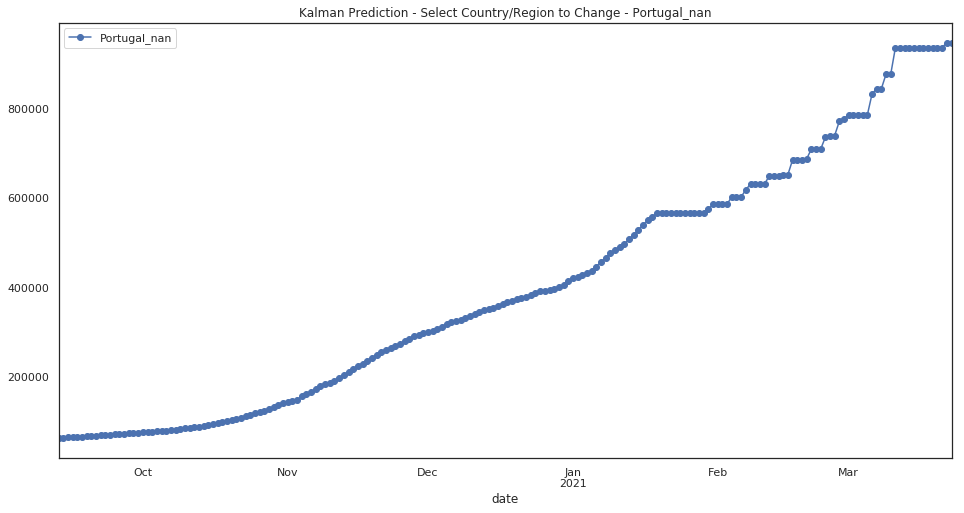

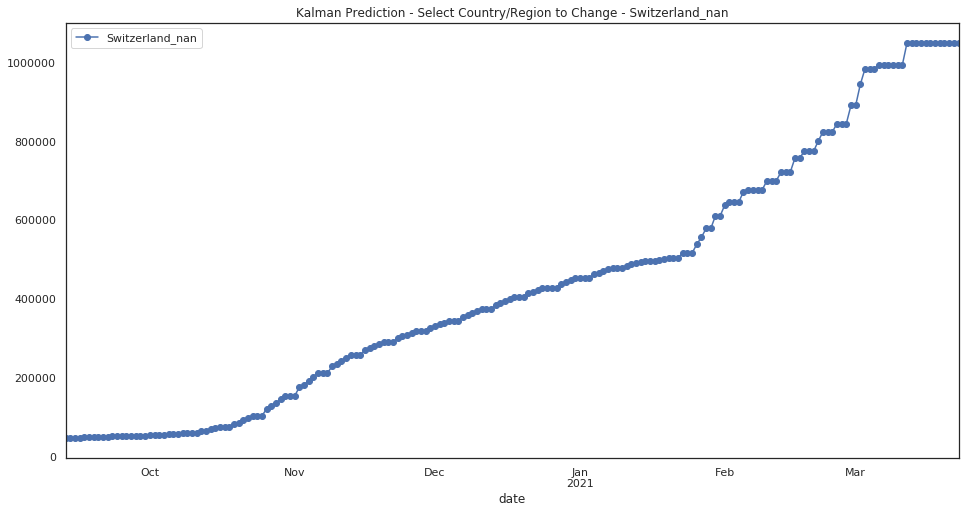

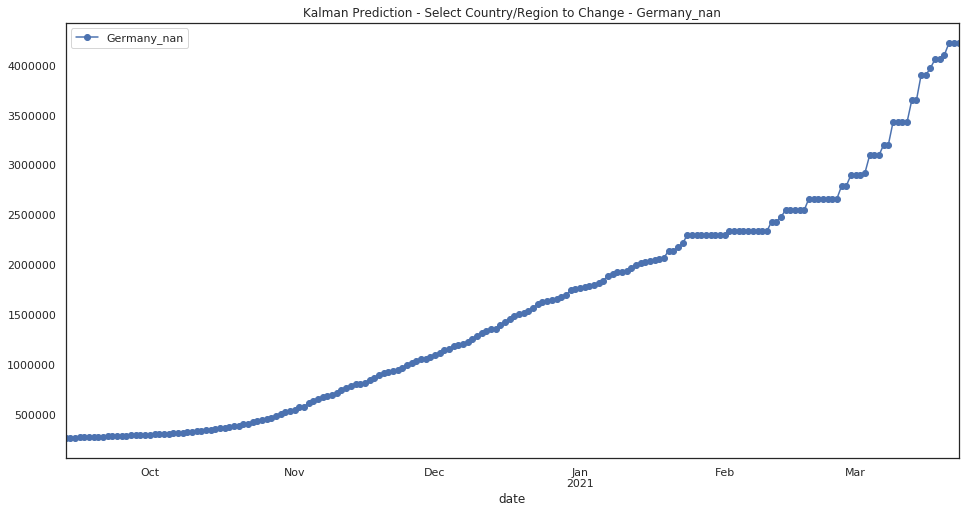

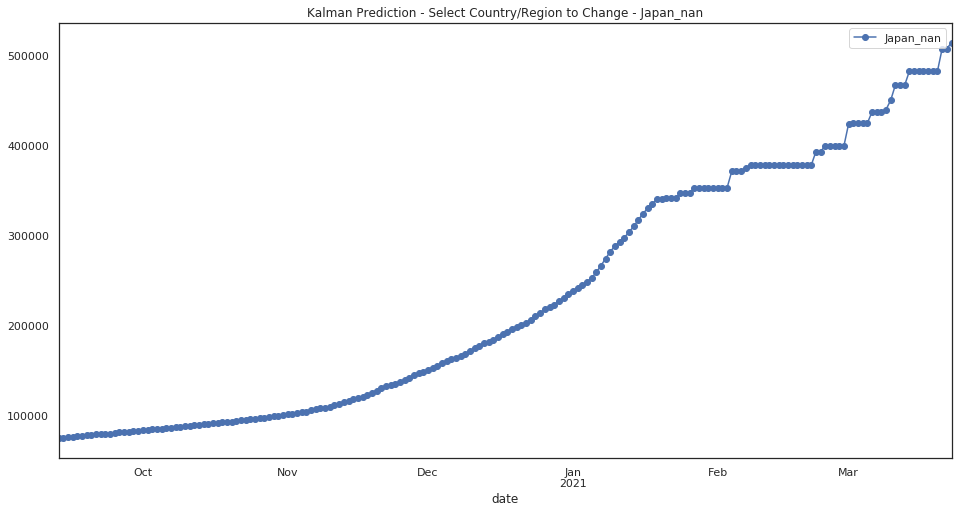

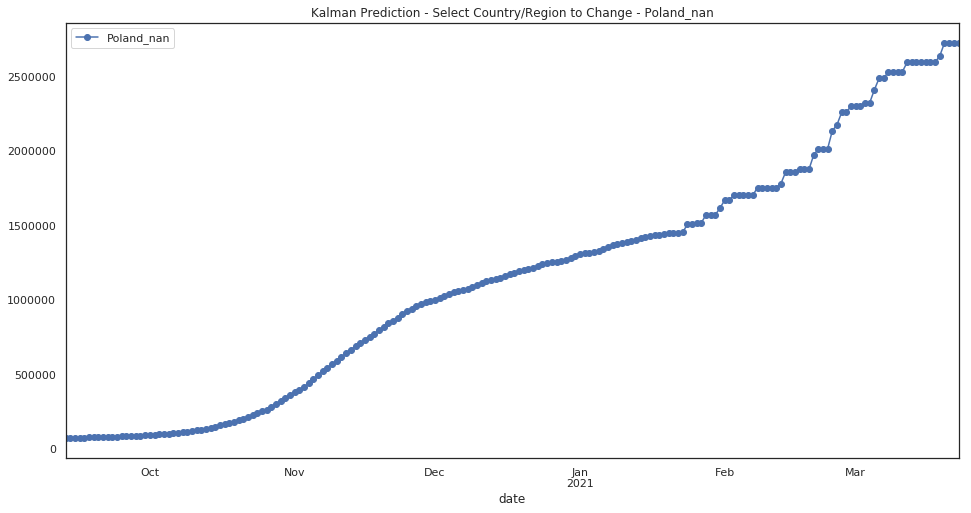

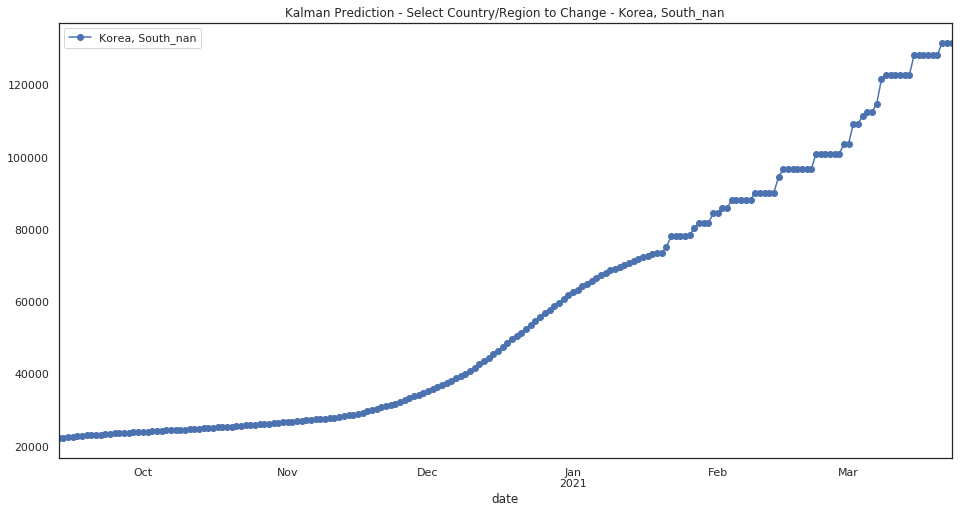

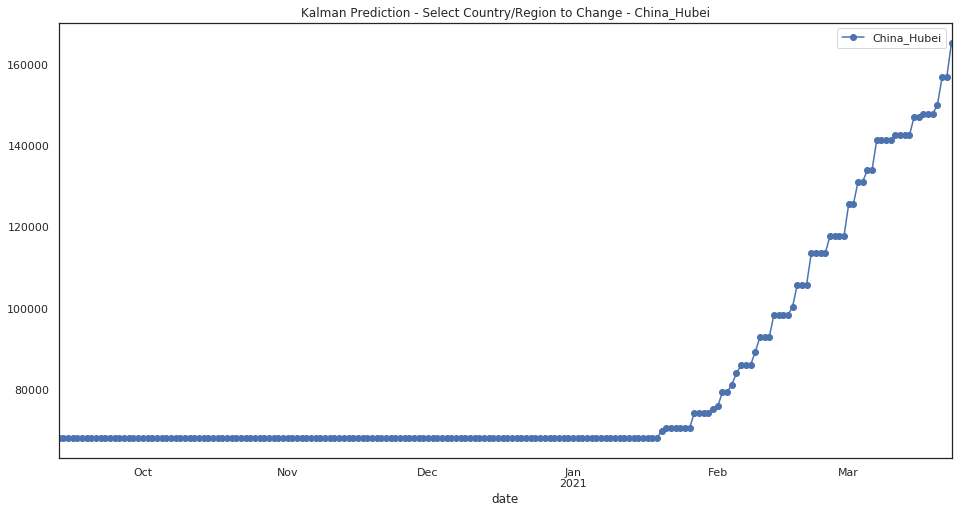

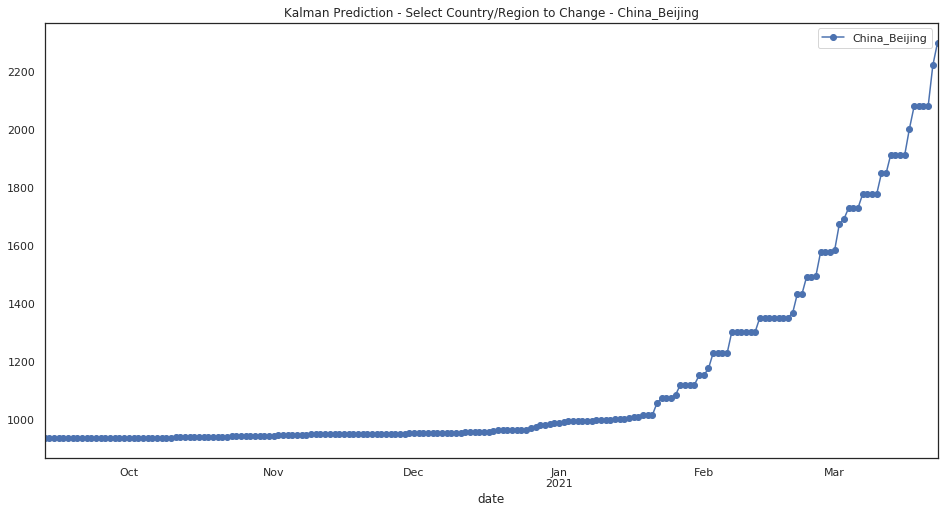

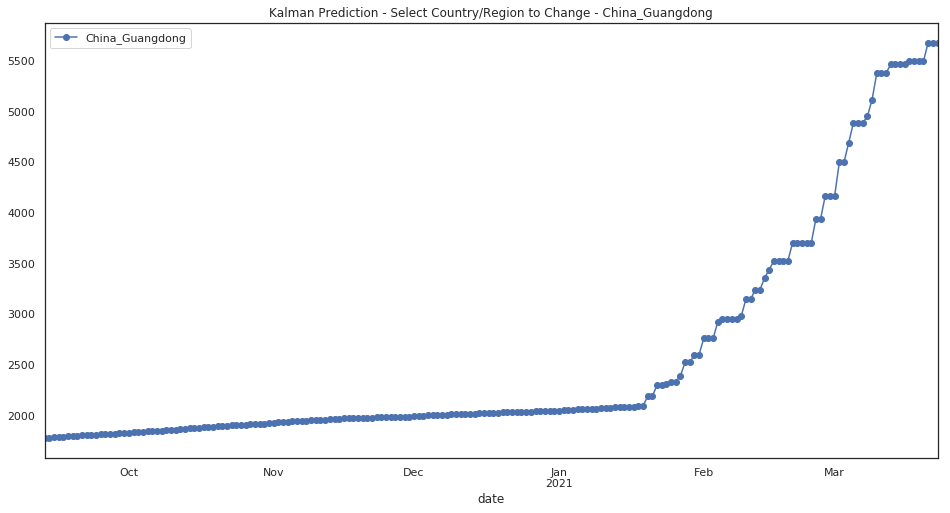

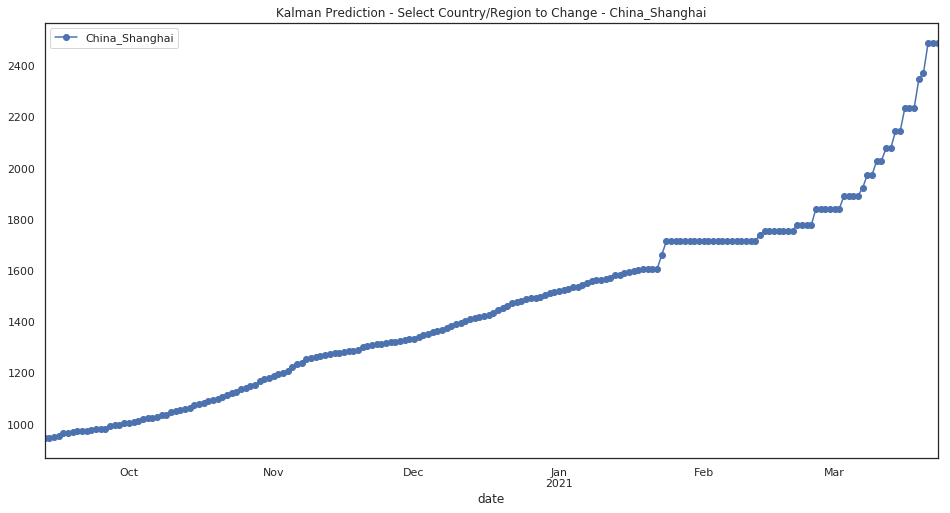

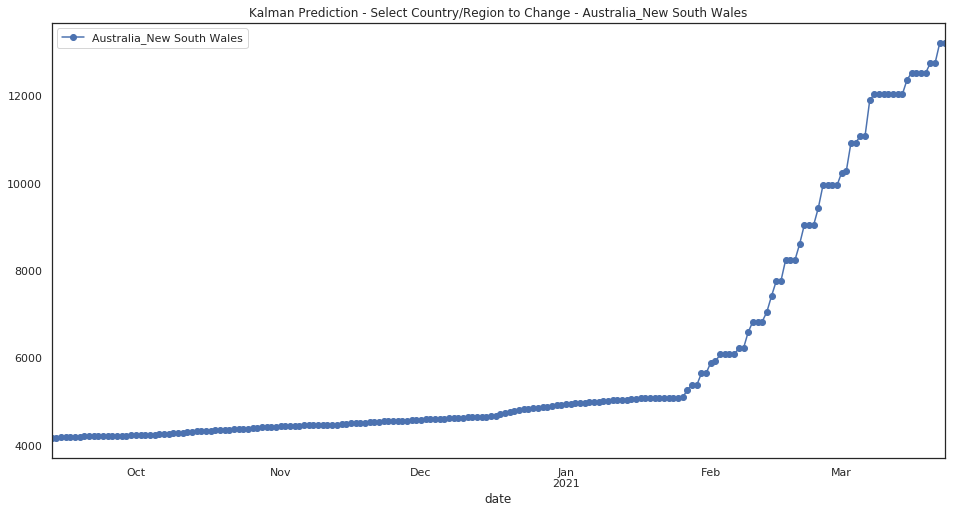

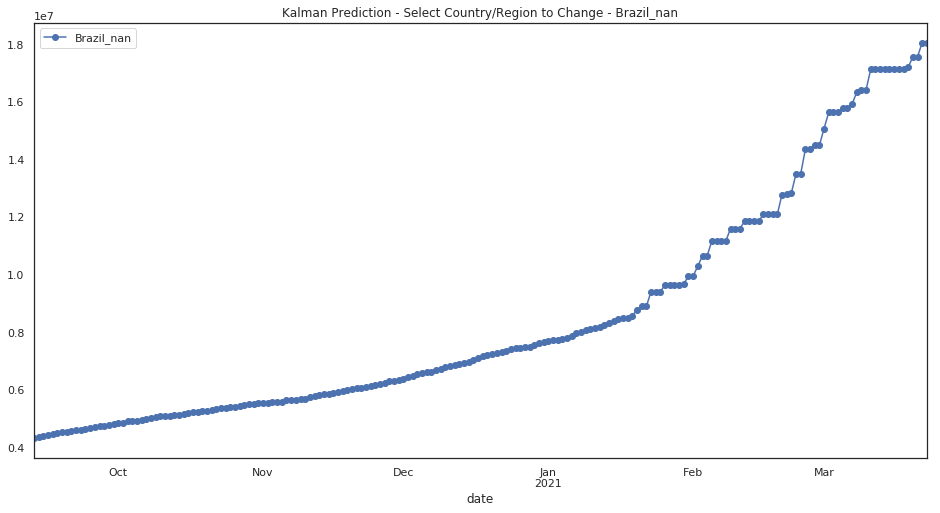

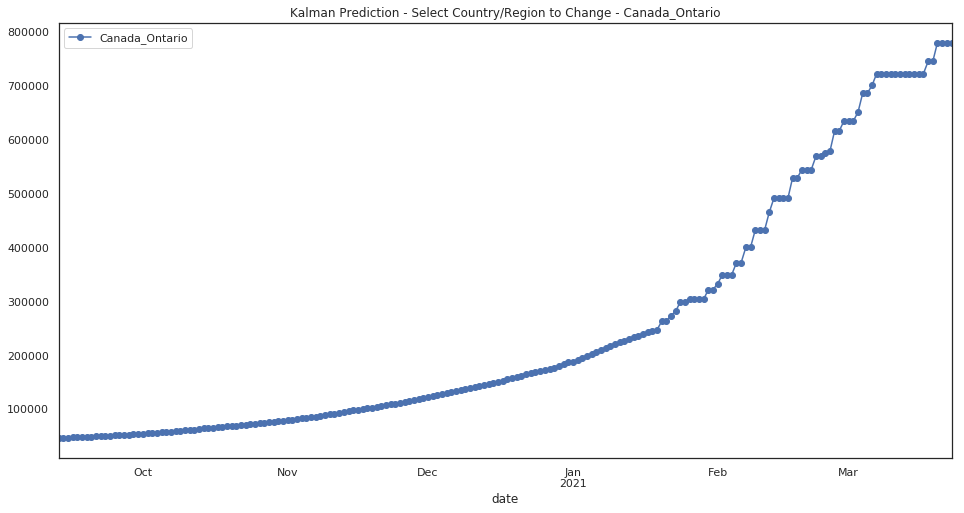

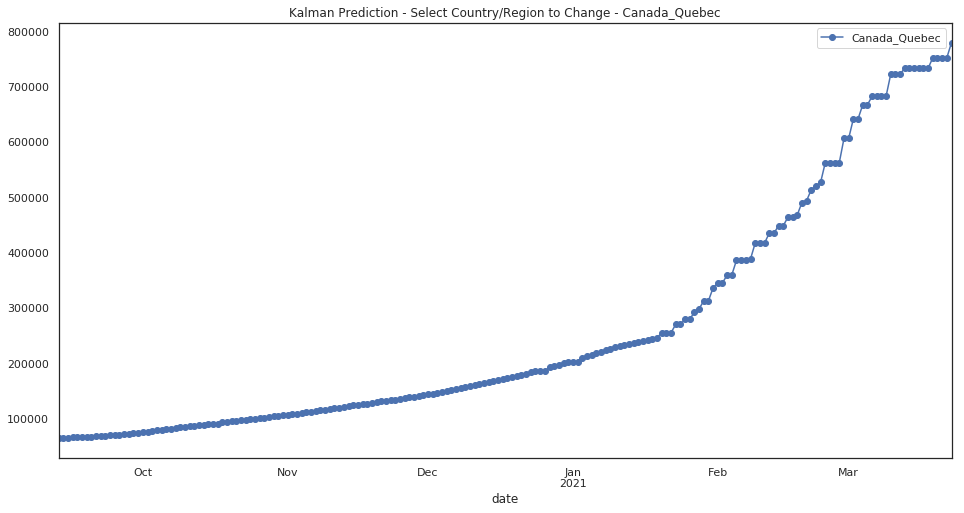

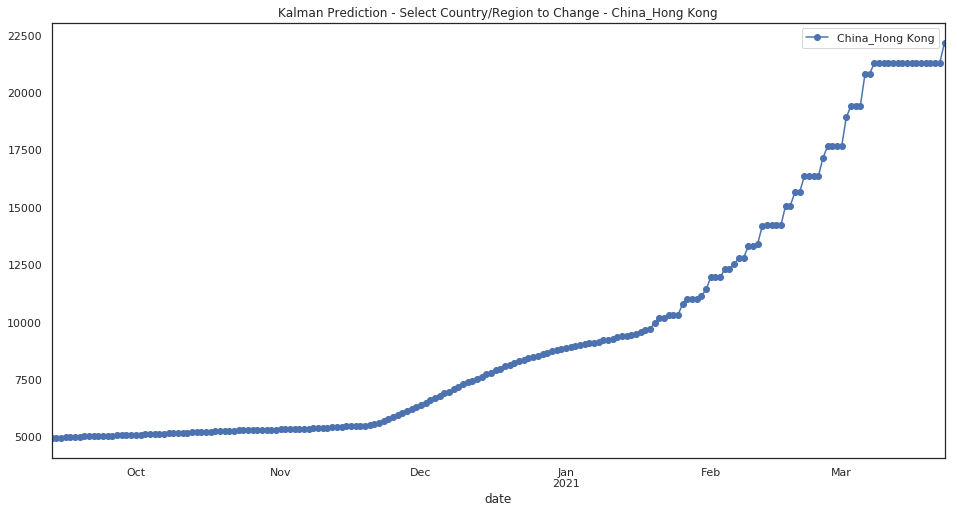

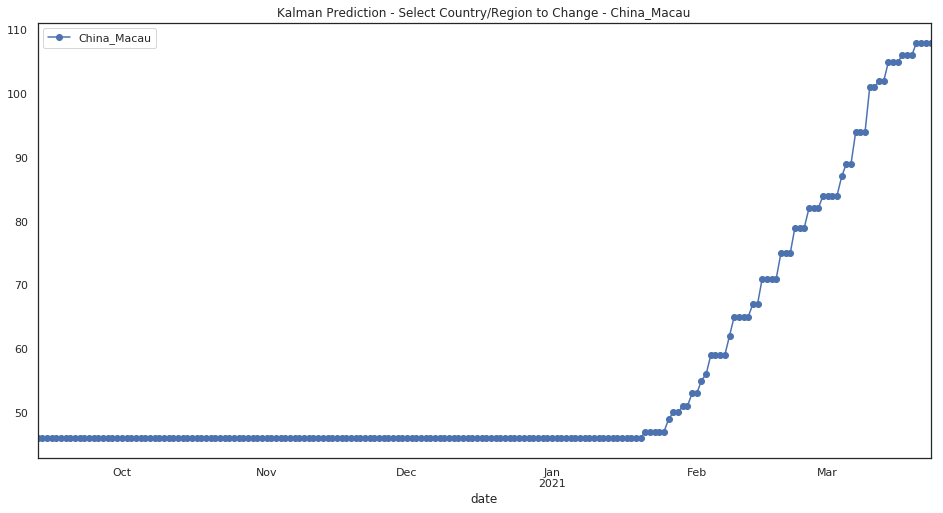

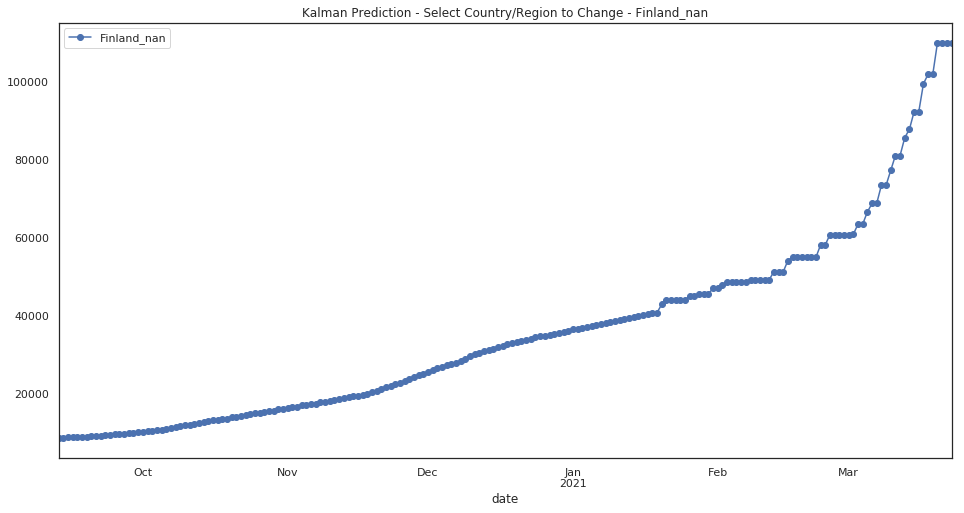

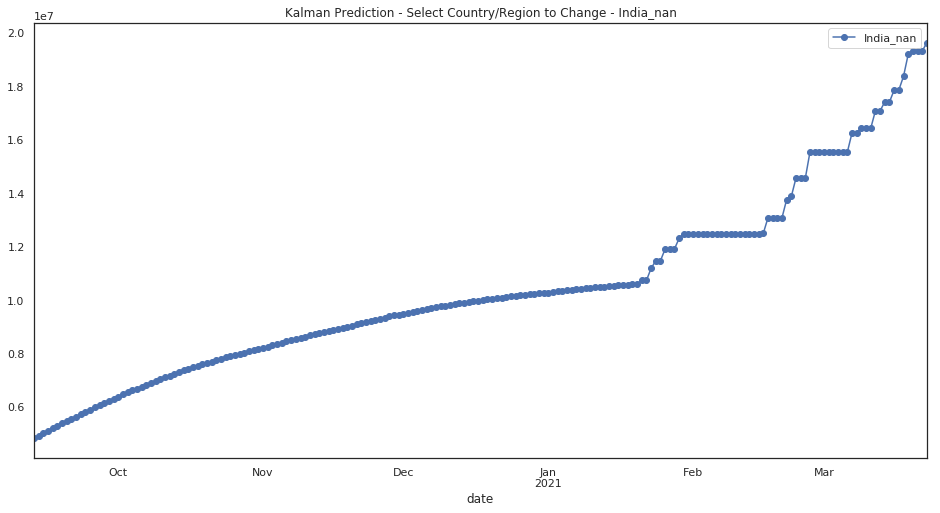

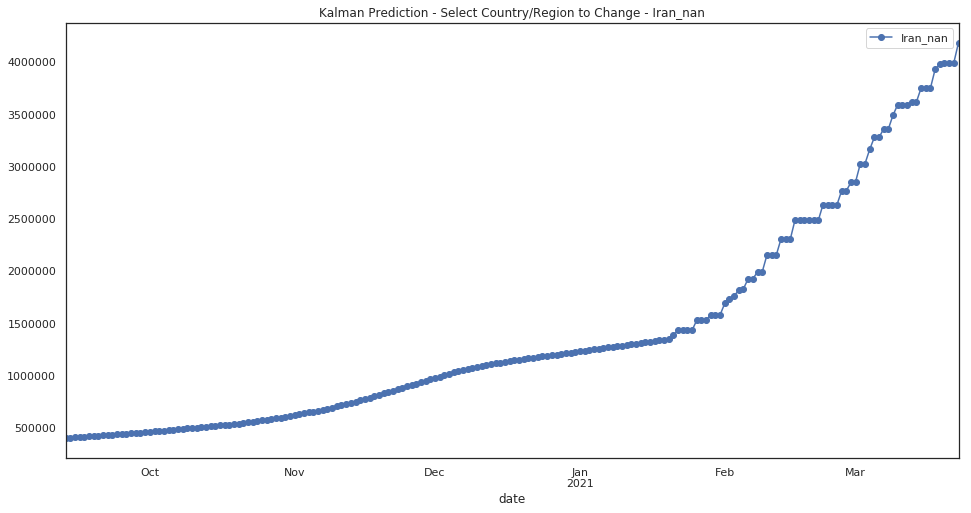

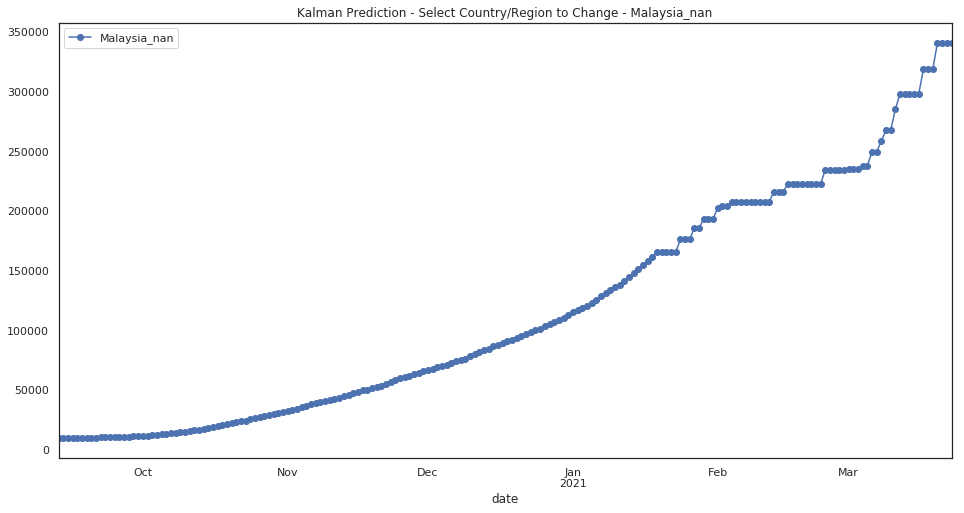

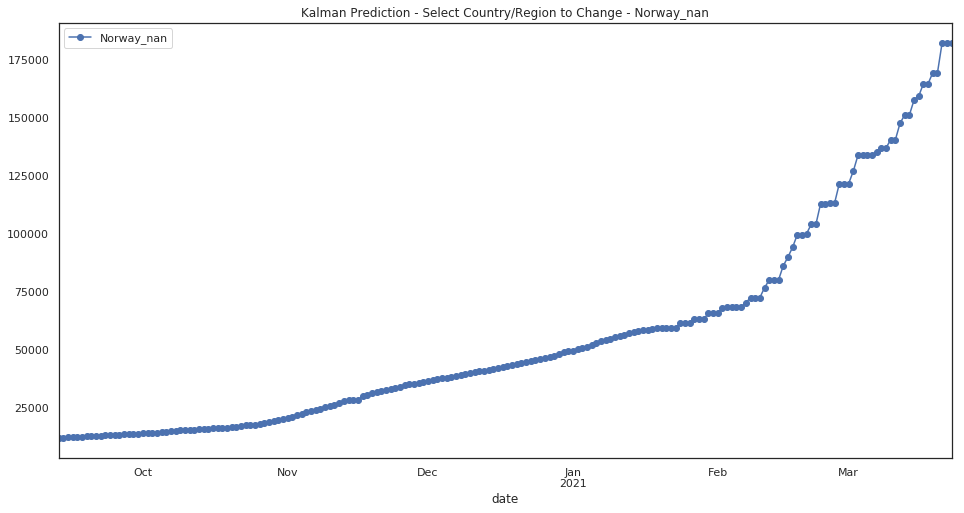

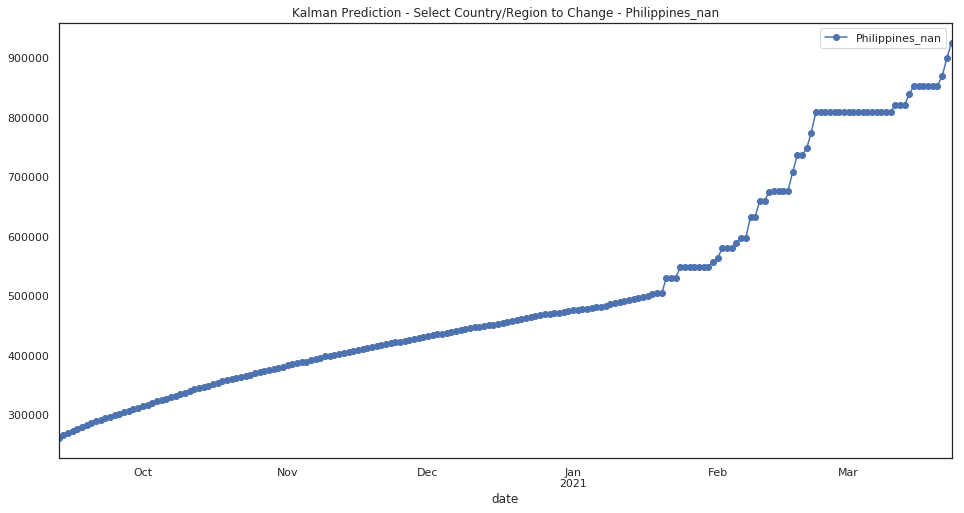

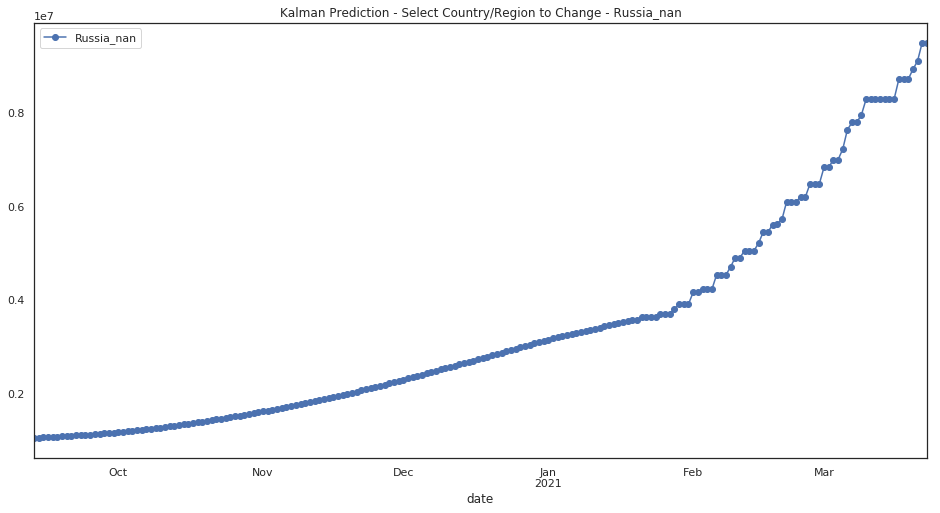

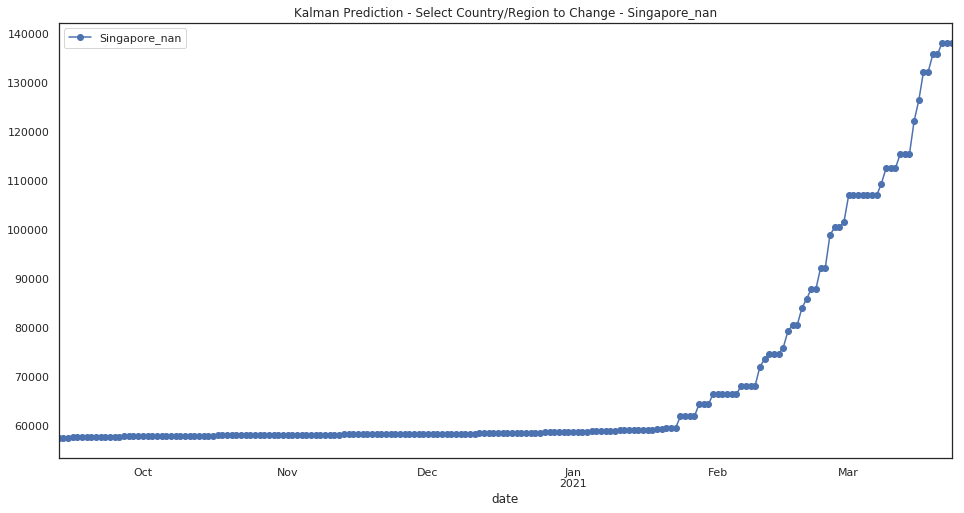

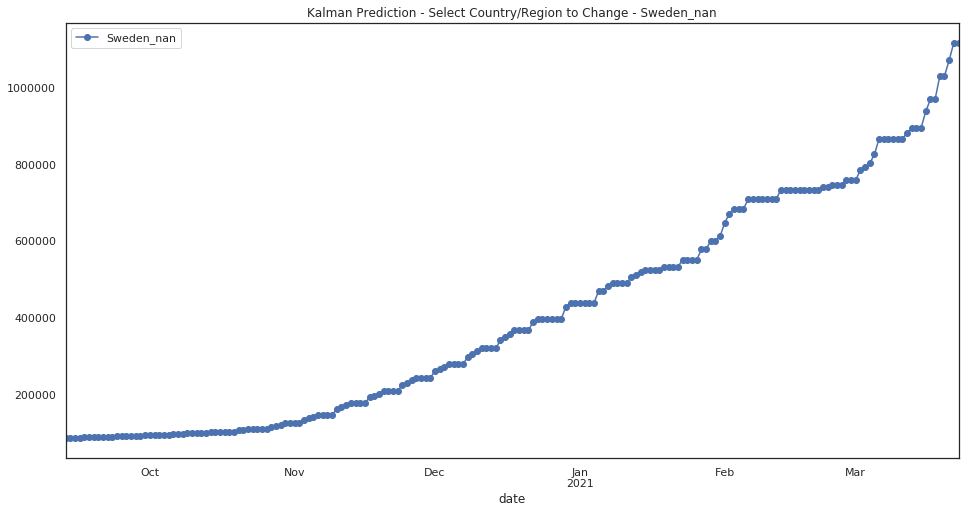

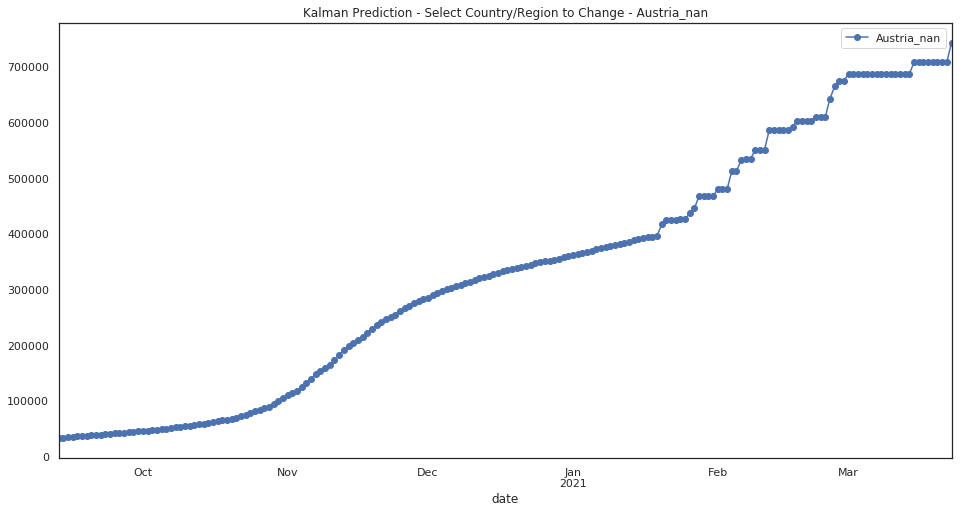

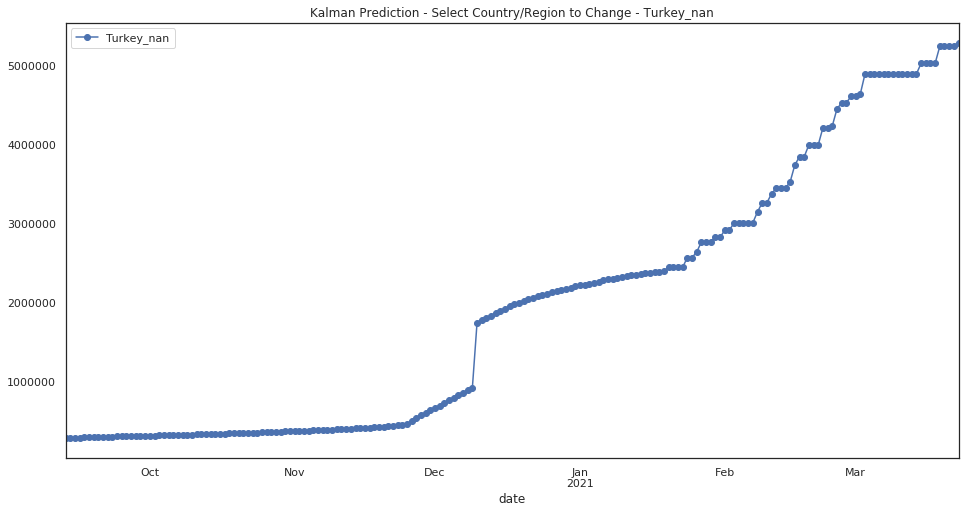

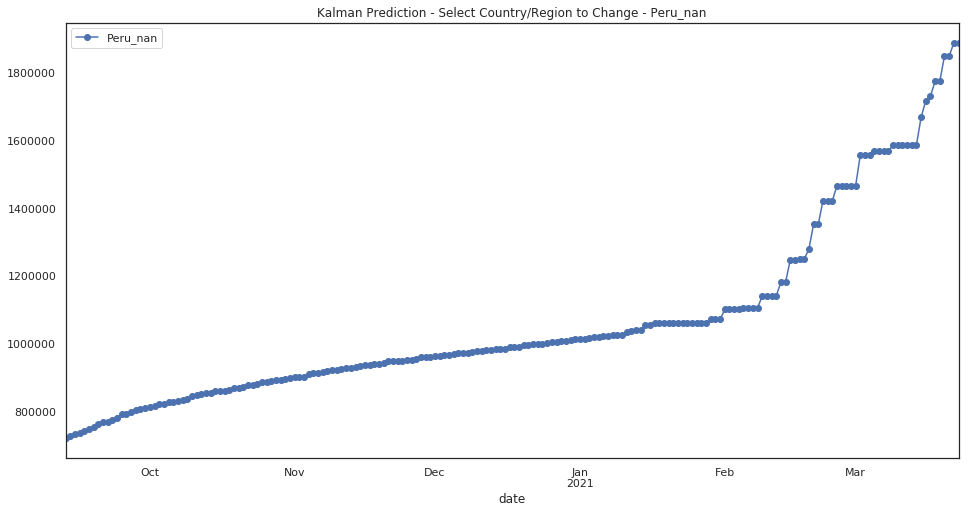

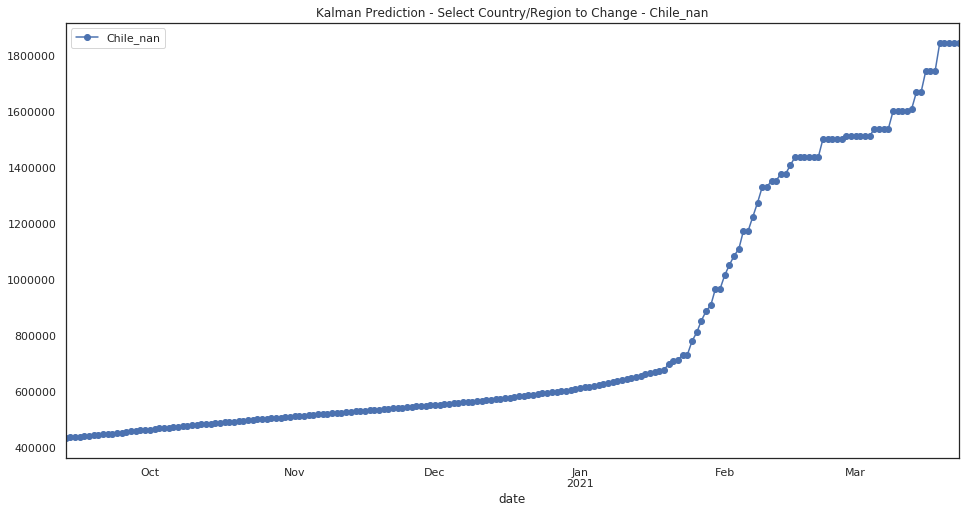

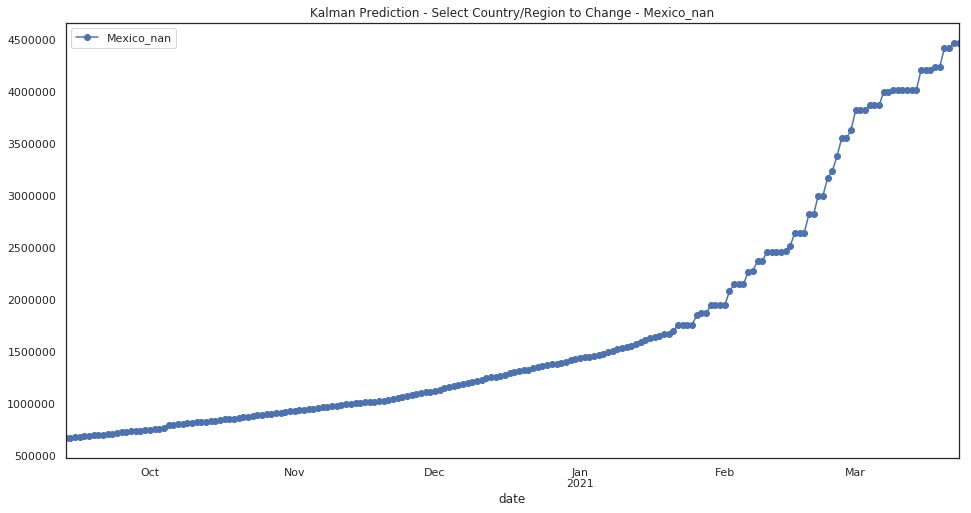

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-03-23 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      54976983.0
India_nan                                   NaN      19643456.0
Brazil_nan                                  NaN      18058711.0
Russia_nan                                  NaN       9486667.0
Spain_nan                                   NaN       8031110.0
United Kingdom_nan                          NaN       7136249.0
France_nan                                  NaN       6046973.0
Turkey_nan                                  NaN       5292953.0
Colombia_nan                                NaN       4675388.0
Italy_nan                                   NaN       4499092.0
Mexico_nan                                  NaN       4468135.0
Germany_nan                                 NaN       4228651.0
Iran_nan                                    NaN       4185501.0
Argentina_nan                               NaN       3269880.0
Czechia_nan                                 NaN       3121347.0
South Africa_nan                            NaN       2885963.0
Ukraine_nan                                 NaN       2819847.0
Poland_nan                                  NaN       2727310.0
Indonesia_nan                               NaN       1970712.0
Peru_nan                                    NaN       1887835.0
Chile_nan                                   NaN       1845829.0
Netherlands_nan                             NaN       1522224.0
Romania_nan                                 NaN       1489217.0
Iraq_nan                                    NaN       1303247.0
Bulgaria_nan                                NaN       1214124.0
Belgium_nan                                 NaN       1171755.0
Sweden_nan                                  NaN       1117253.0
Switzerland_nan                             NaN       1050477.0
Portugal_nan                                NaN        946753.0
Pakistan_nan                                NaN        937330.0
...                                         ...             ...
Grenada_nan                                 NaN           296.0
Australia_Australian Capital Territory      NaN           256.0
United Kingdom_British Virgin Islands       NaN           195.0
Canada_Yukon                                NaN           186.0
China_Ningxia                               NaN           176.0
Australia_Northern Territory                NaN           165.0
Timor-Leste_nan                             NaN           164.0
Fiji_nan                                    NaN           154.0
China_Macau                                 NaN           108.0
Saint Kitts and Nevis_nan                   NaN            93.0
France_New Caledonia                        NaN            92.0
Holy See_nan                                NaN            65.0
Canada_Northwest Territories                NaN            64.0
Denmark_Greenland                           NaN            63.0
United Kingdom_Falkland Islands (Malvinas)  NaN            63.0
Laos_nan                                    NaN            56.0
Solomon Islands_nan                         NaN            36.0
China_Qinghai                               NaN            31.0
France_Saint Pierre and Miquelon            NaN            28.0
United Kingdom_Anguilla                     NaN            25.0
Canada_Repatriated Travellers               NaN            24.0
Canada_Grand Princess                       NaN            19.0
United Kingdom_Montserrat                   NaN            14.0
MS Zaandam_nan                              NaN             9.0
Marshall Islands_nan                        NaN             4.0
France_Wallis and Futuna                    NaN             4.0
Samoa_nan                                   NaN             2.0
Vanuatu_nan                                 NaN             1.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[272 rows x 2 columns]

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          58913.0      35365.0      67122.0      26751.0   
2020-09-14          58962.0      35508.0      67330.0      26832.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39301.0      12568.0      50201.0       2056.0   
2020-09-22          39348.0      12725.0      50394.0       1681.0   
2020-09-23          39396.0      12879.0      50583.0       2166.0   
2020-09-24          39411.0      13023.0      50764.0       1753.0   
2020-09-25          39433.0      13125.0      50941.0       2193.0   
2020-09-26          39443.0      13252.0      51105.0       1836.0   
2020-09-27          39473.0      13384.0      51260.0       2203.0   
2020-09-28          39487.0      13512.0      51408.0       2314.0   
2020-09-29          39507.0      13600.0      51563.0       1966.0   
2020-09-30          39522.0      13743.0      51725.0       2437.0   
2020-10-01          39538.0      13896.0      51887.0       2050.0   
2020-10-02          39545.0      14019.0      52046.0       2444.0   
2020-10-03          39554.0      14176.0      52197.0       2110.0   
2020-10-04          39592.0      14342.0      52339.0       2413.0   
2020-10-05          39661.0      14491.0      52474.0       2637.0   
2020-10-06          39722.0      14653.0      52603.0       2370.0   
2020-10-07          39791.0      14796.0      52725.0       3027.0   
2020-10-08          39858.0      14962.0      52862.0       2568.0   
2020-10-09          39929.0      15125.0      53007.0       3105.0   
2020-10-10          39944.0      15296.0      53146.0       2696.0   
2020-10-11          40038.0      15469.0      53281.0       3066.0   
2020-10-12          40093.0      15637.0      53517.0       3323.0   
...                     ...          ...          ...          ...   
2021-02-23          71342.0     128321.0     152539.0      15901.0   
2021-02-24          71651.0     131093.0     158501.0      15901.0   
2021-02-25          72174.0     133425.0     161471.0      16087.0   
2021-02-26          73339.0     132714.0     159437.0      16731.0   
2021-02-27          73610.0     133405.0     159437.0      16731.0   
2021-02-28          76037.0     133405.0     159392.0      16731.0   
2021-03-01          76717.0     138159.0     164573.0      16731.0   
2021-03-02          77862.0     140627.0     167297.0      17053.0   
2021-03-03          78669.0     139601.0     165692.0      17053.0   
2021-03-04          81956.0     139601.0     165795.0      17053.0   
2021-03-05          83074.0     140439.0     169035.0      17053.0   
2021-03-06          82510.0     141070.0     170842.0      17053.0   
2021-03-07          85519.0     144020.0     169816.0      17053.0   
2021-03-08          86426.0     147347.0     169816.0      17053.0   
2021-03-09          89119.0     147306.0     169816.0      17696.0   
2021-03-10          90319.0     146900.0     174973.0      17884.0   
2021-03-11          89734.0     146944.0     177663.0      18314.0   
2021-03-12          89774.0     147359.0     175904.0      19119.0   
2021-03-13          89734.0     152818.0     175996.0      19309.0   
2021-03-14          91883.0     160313.0     179661.0      19766.0   
2021-03-15          95227.0     160868.0     183817.0      20670.0   
2021-03-16          95628.0     166940.0     183448.0      20859.0   
2021-03-17          95355.0     170394.0     185372.0      21815.0   
2021-03-18          95197.0     172164.0     186935.0      21815.0   
2021-03-19

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'Spain_nan',
 'United Kingdom_nan',
 'France_nan',
 'Turkey_nan',
 'Colombia_nan',
 'Italy_nan',
 'Mexico_nan',
 'Germany_nan',
 'Iran_nan',
 'Argentina_nan',
 'Czechia_nan',
 'South Africa_nan',
 'Ukraine_nan',
 'Poland_nan',
 'Indonesia_nan',
 'Peru_nan',
 'Chile_nan',
 'Netherlands_nan',
 'Romania_nan',
 'Iraq_nan',
 'Bulgaria_nan',
 'Belgium_nan',
 'Sweden_nan',
 'Switzerland_nan',
 'Portugal_nan',
 'Pakistan_nan',
 'Philippines_nan',
 'Serbia_nan',
 'Israel_nan',
 'Bangladesh_nan',
 'Canada_Quebec',
 'Canada_Ontario',
 'Jordan_nan',
 'Panama_nan',
 'Austria_nan',
 'Kazakhstan_nan',
 'Hungary_nan',
 'Ecuador_nan',
 'Georgia_nan',
 'Lebanon_nan',
 'Morocco_nan',
 'Croatia_nan',
 'Saudi Arabia_nan',
 'Azerbaijan_nan',
 'Denmark_nan',
 'West Bank and Gaza_nan',
 'Nepal_nan',
 'Japan_nan',
 'Slovakia_nan',
 'Greece_nan',
 'United Arab Emirates_nan',
 'Tunisia_nan',
 'Egypt_nan',
 'Bolivia_nan',
 'Libya_nan',
 'Belarus_n

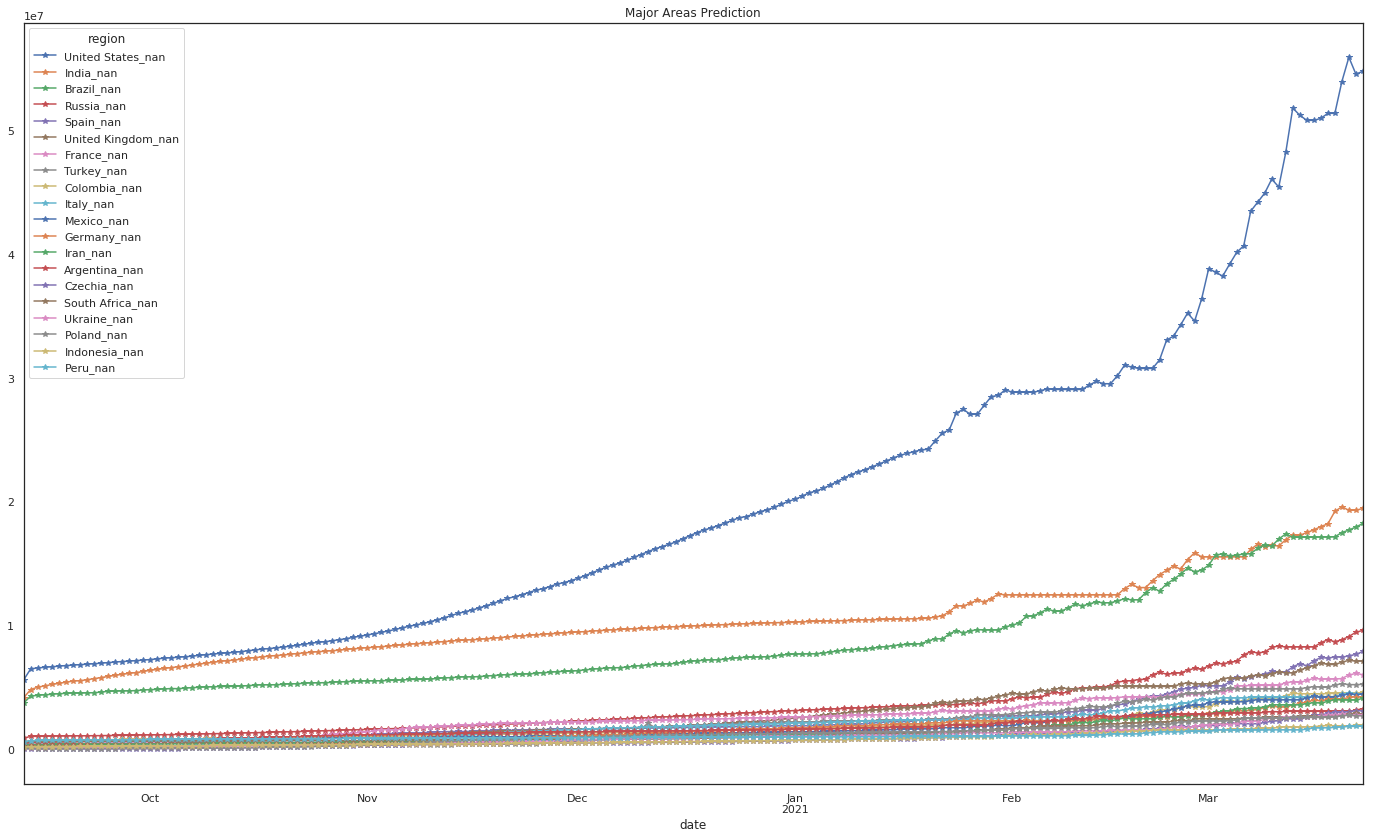

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

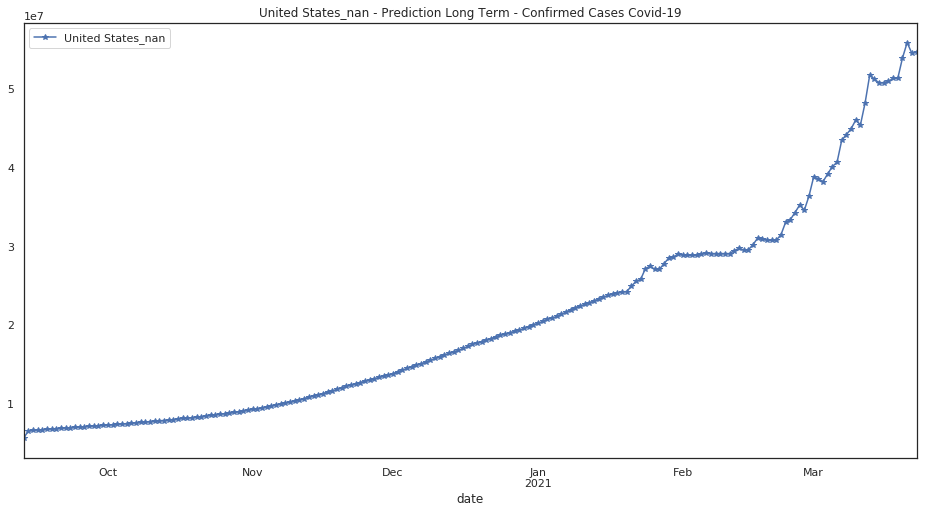

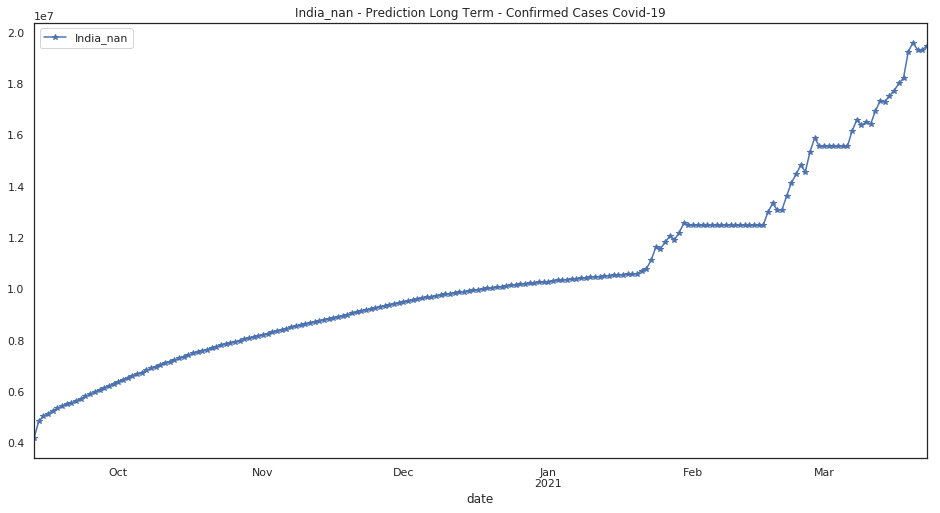

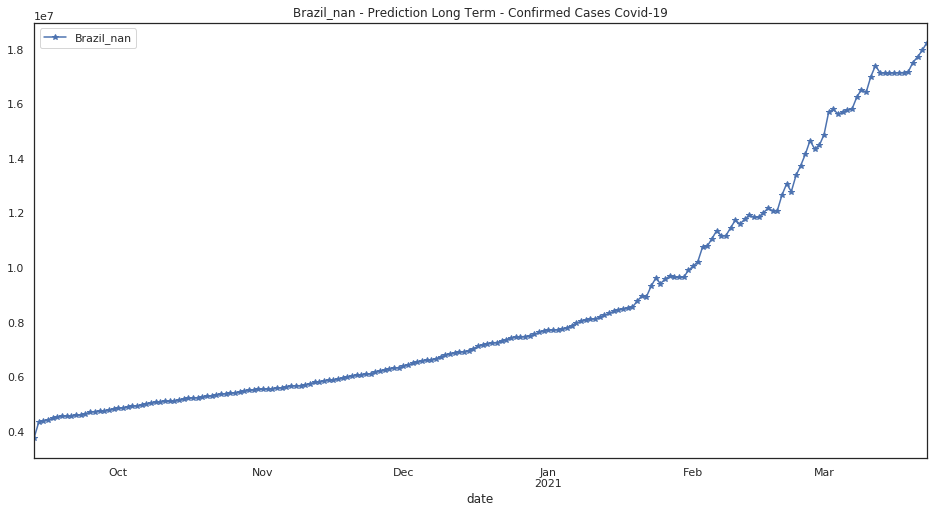

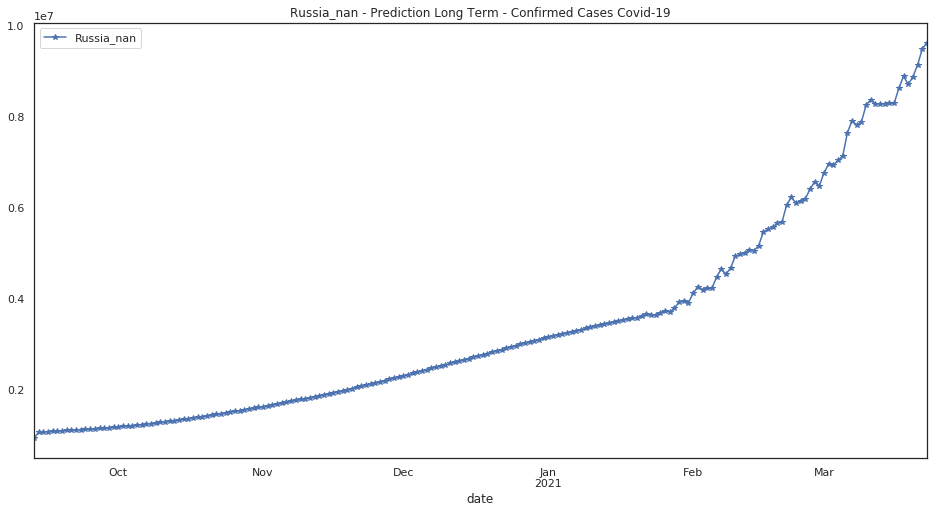

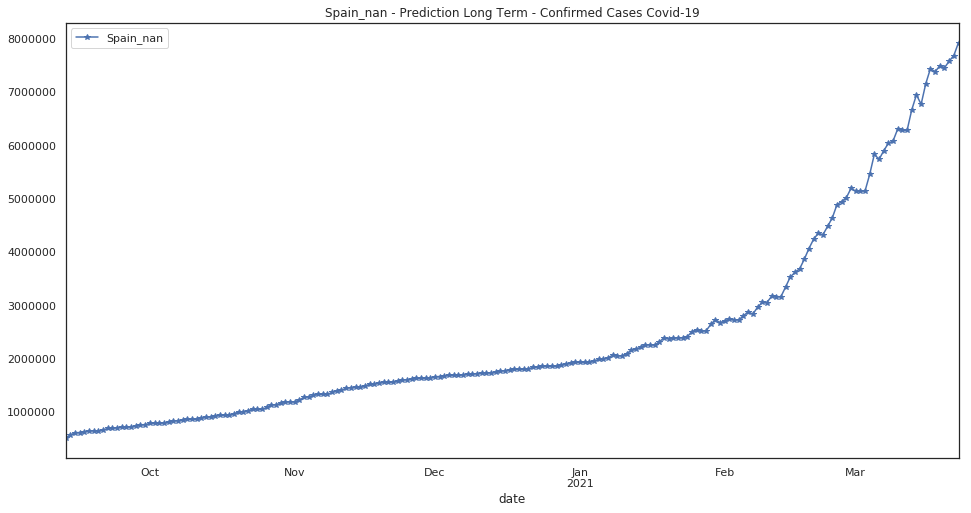

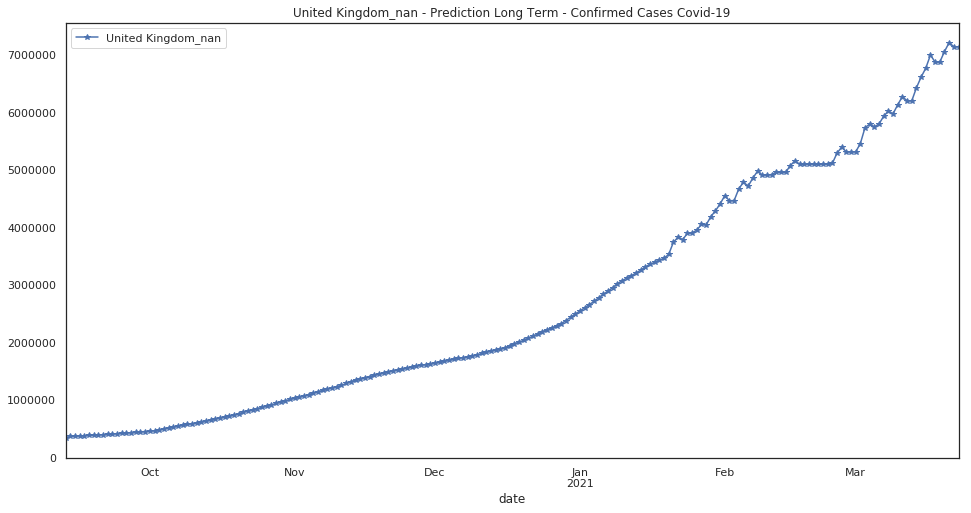

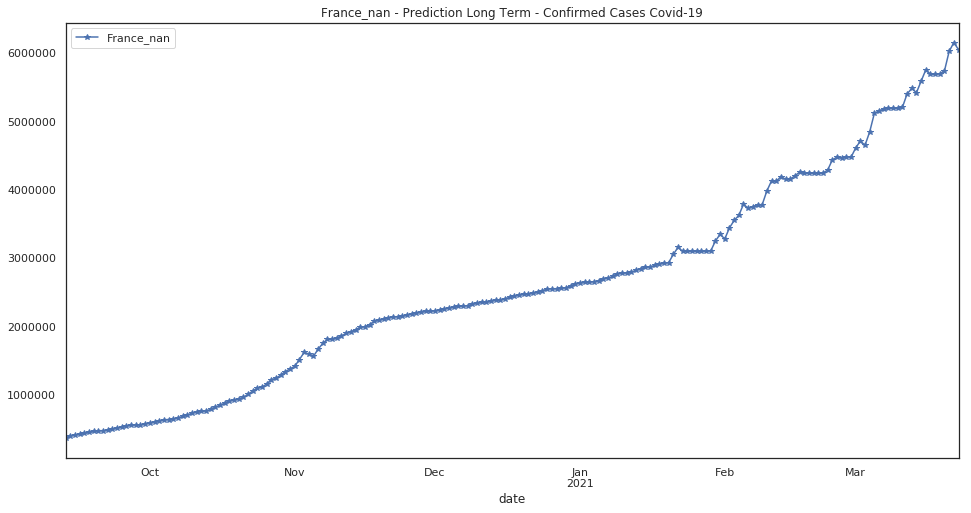

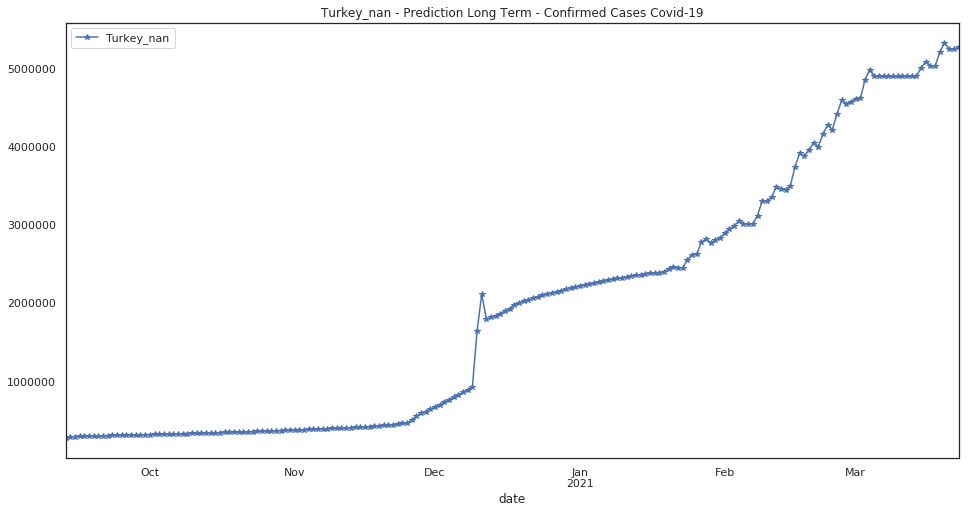

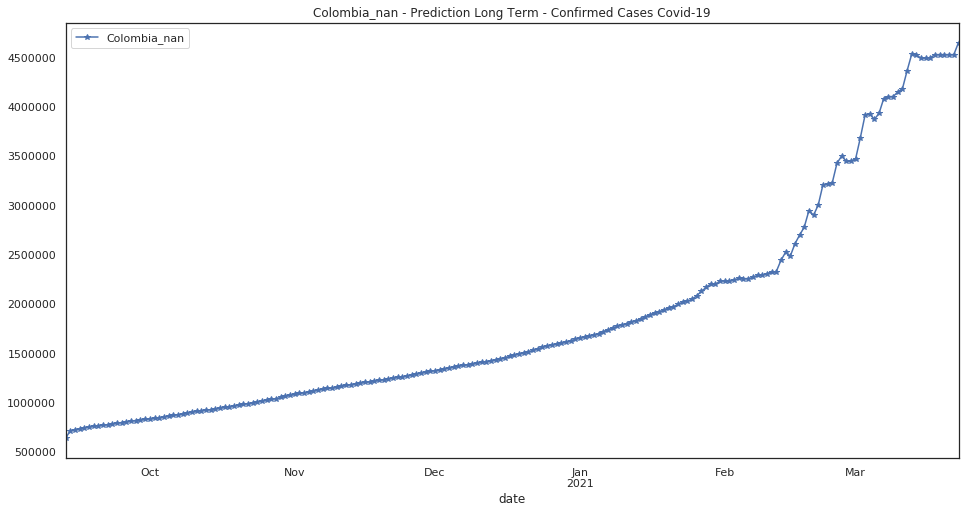

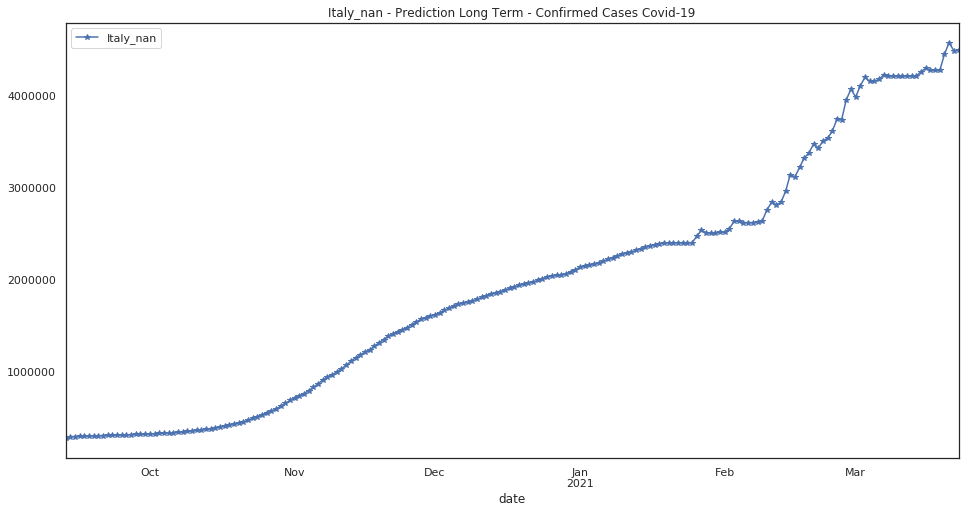

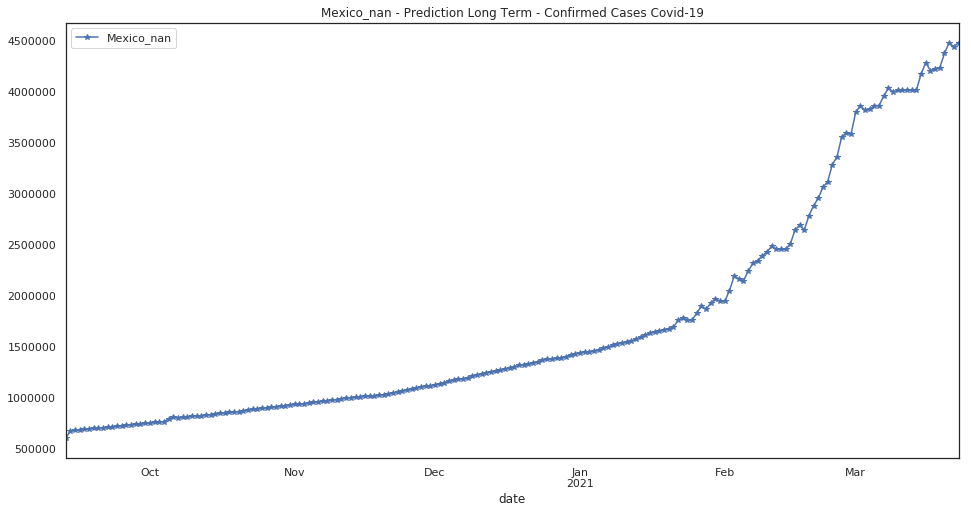

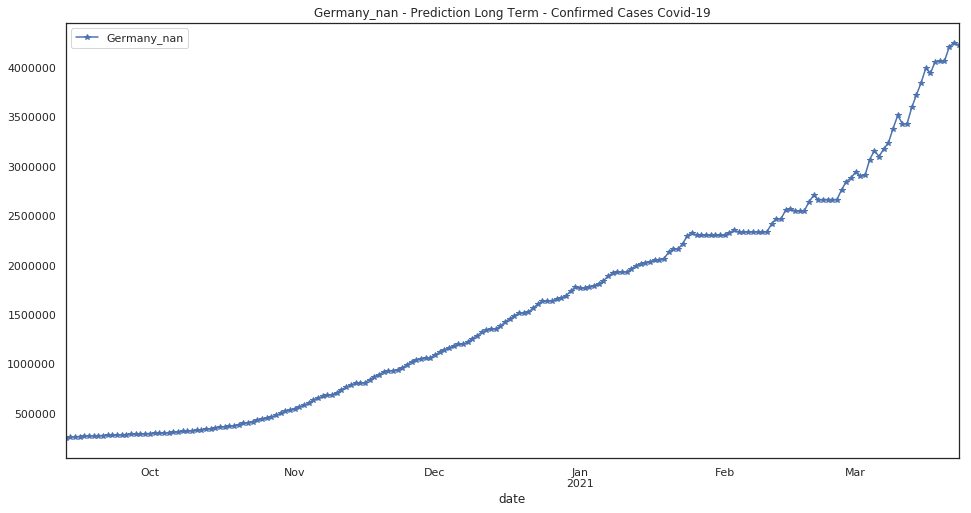

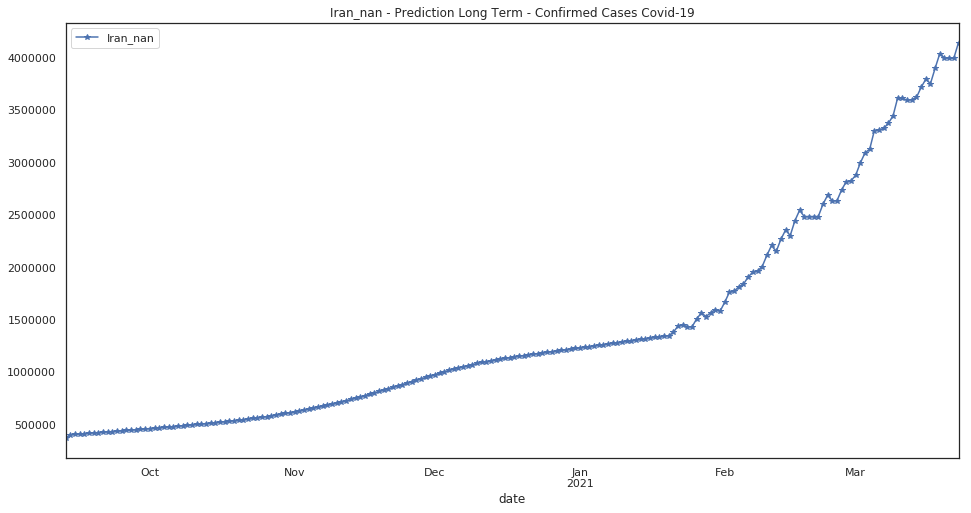

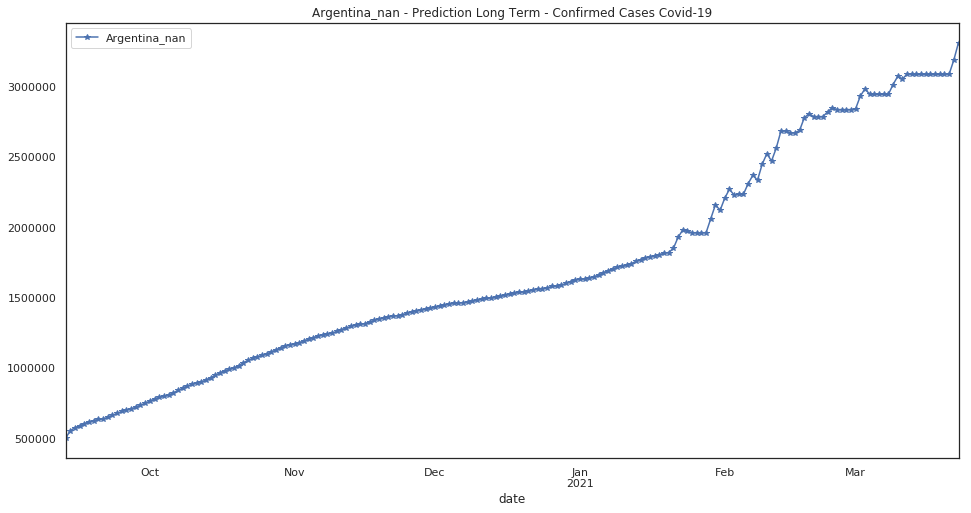

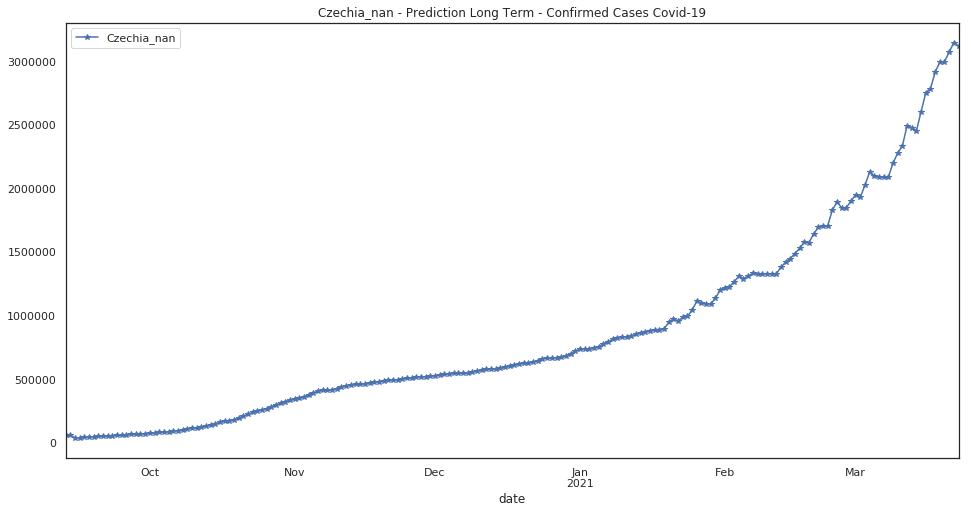

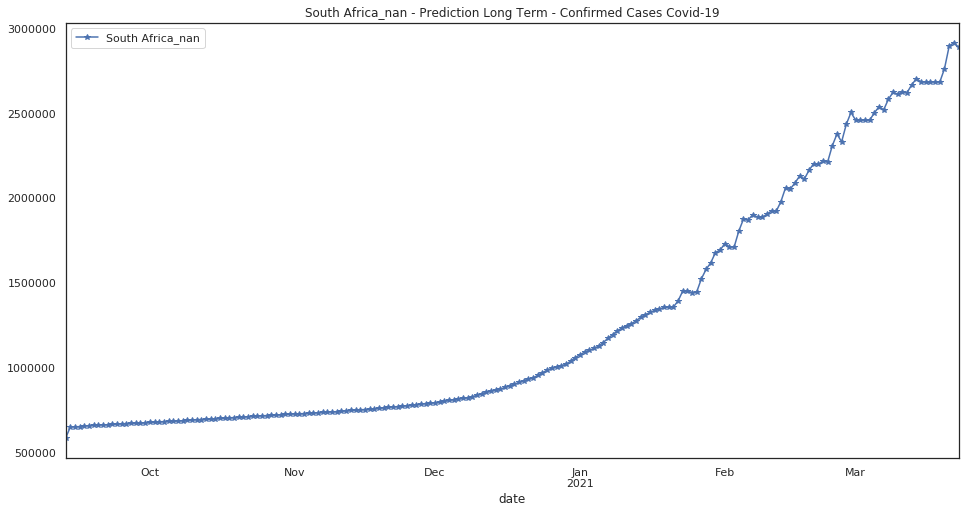

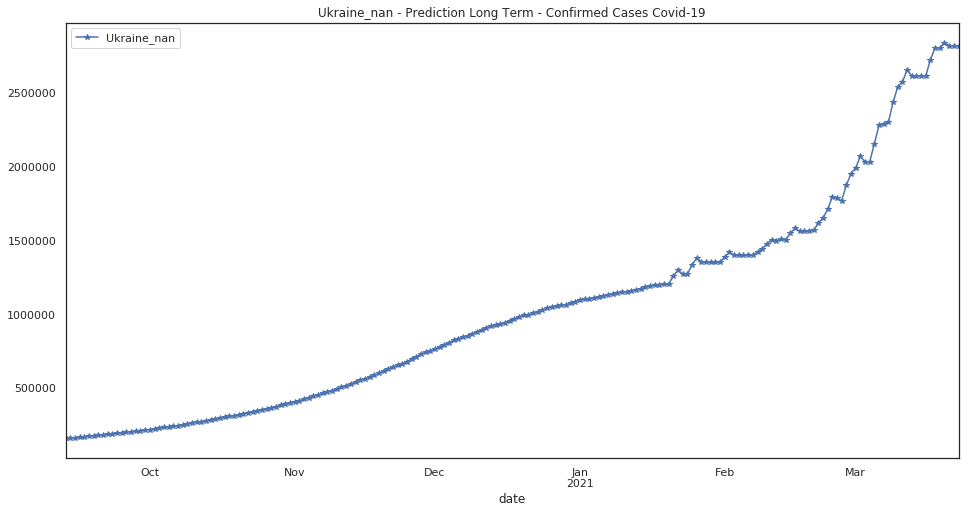

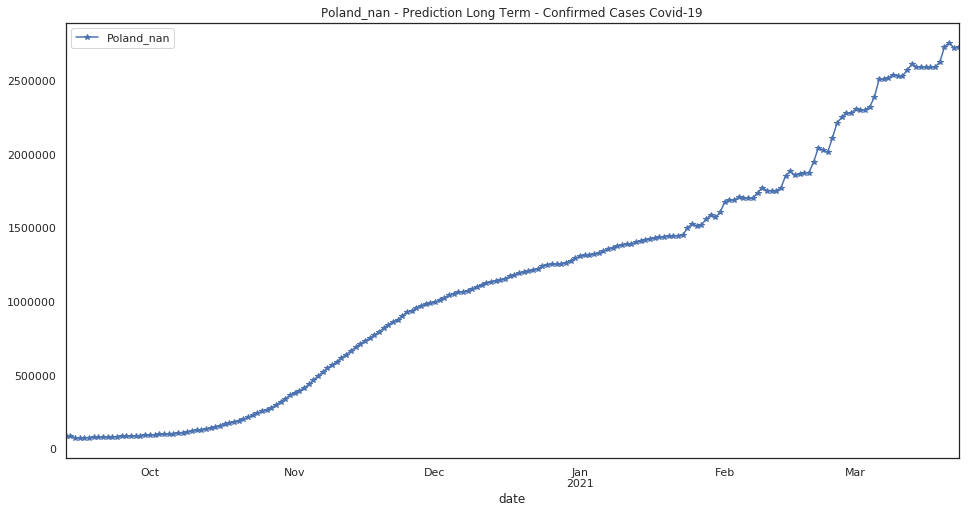

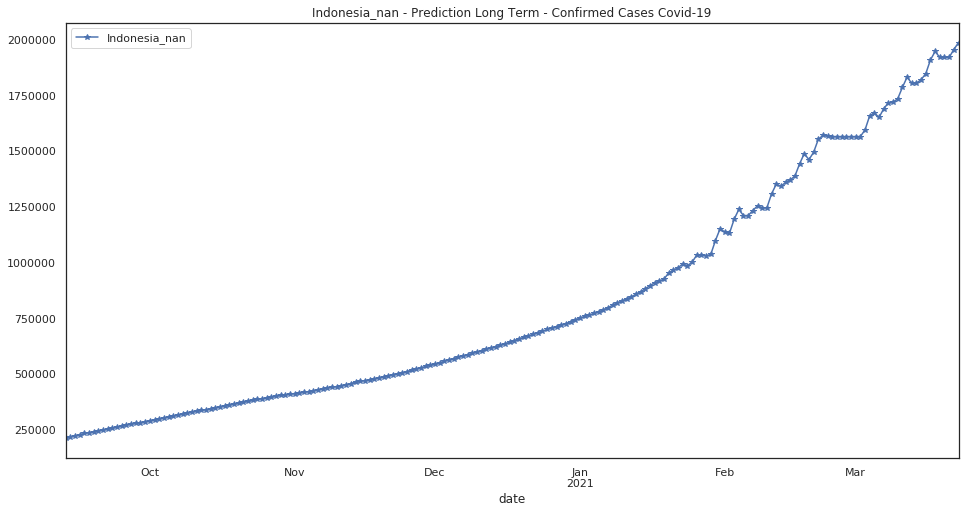

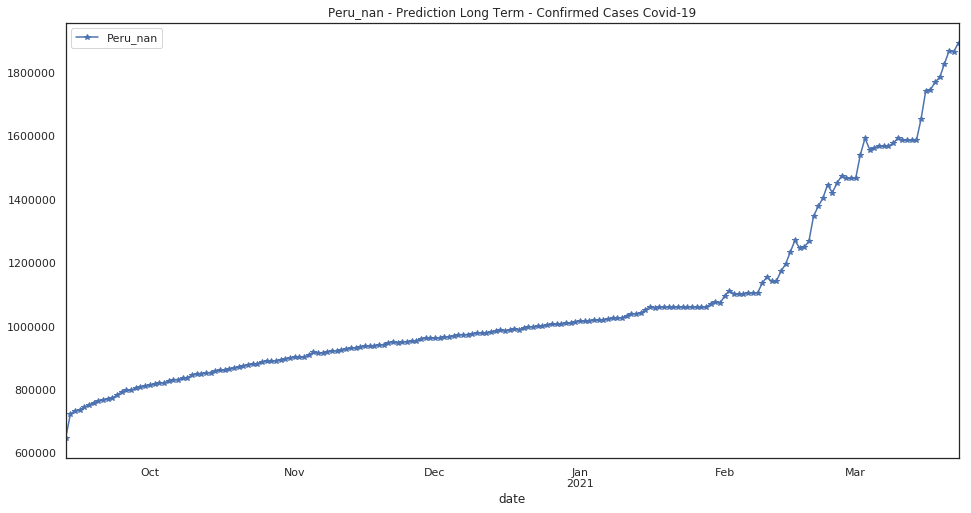

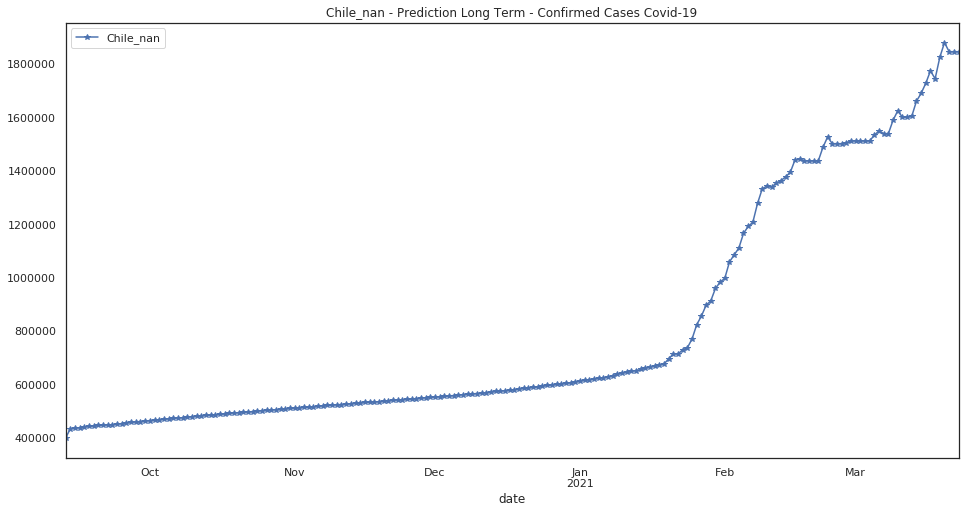

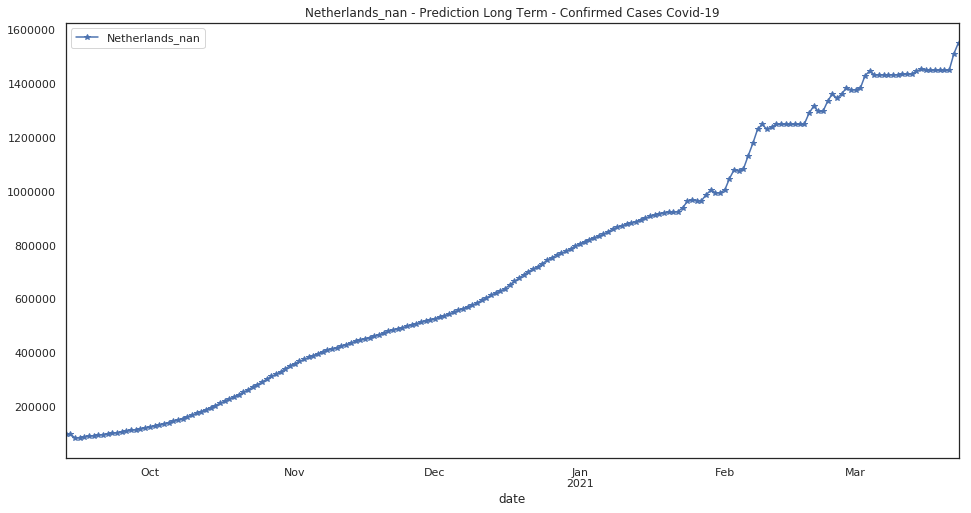

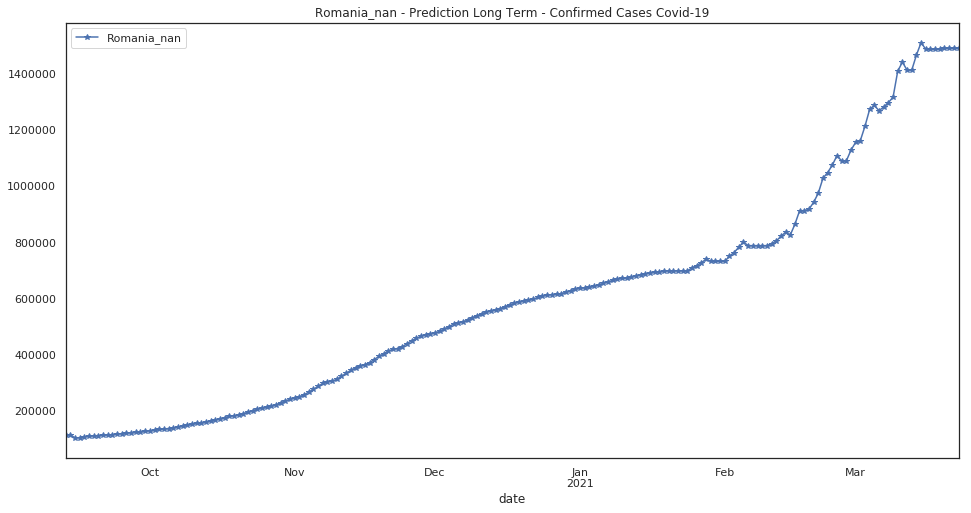

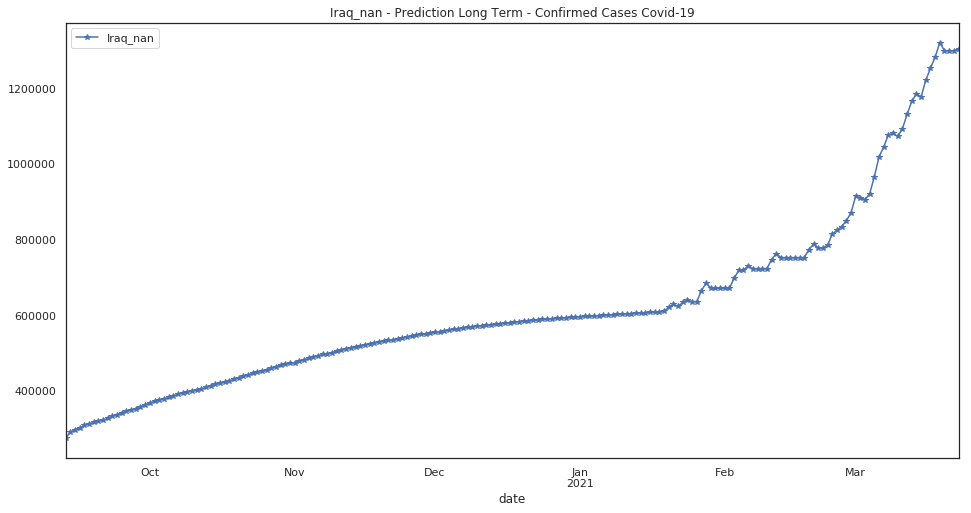

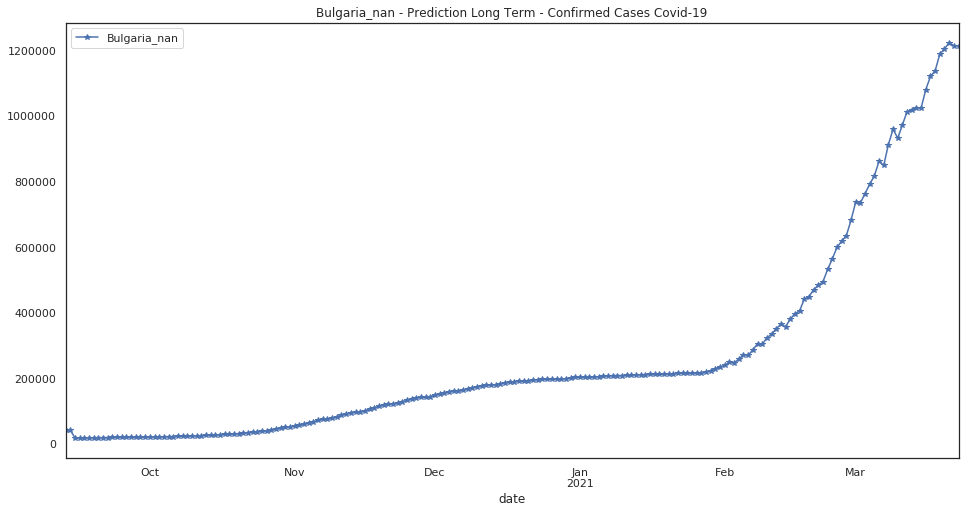

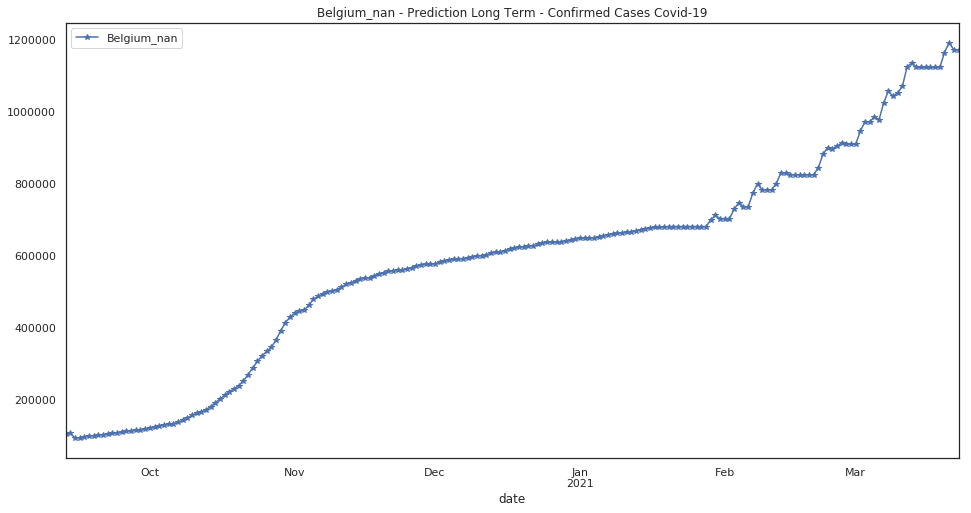

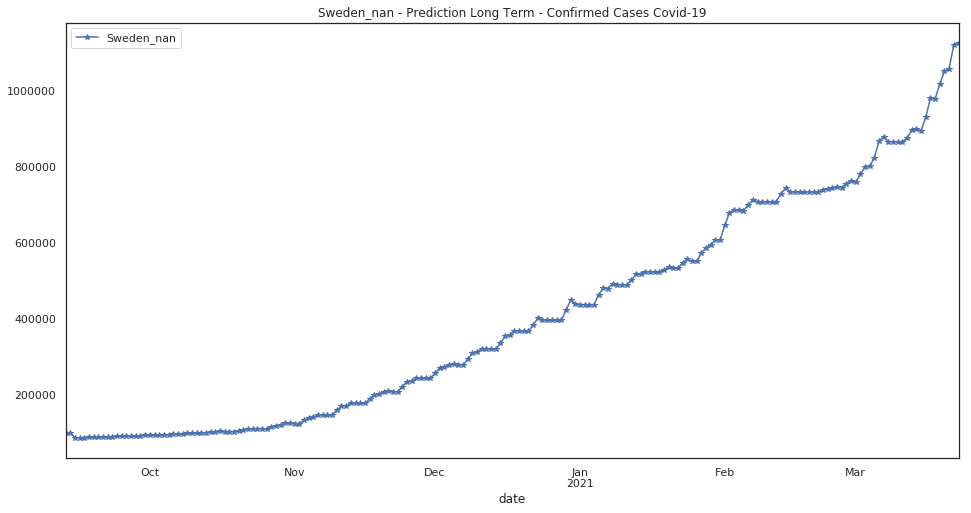

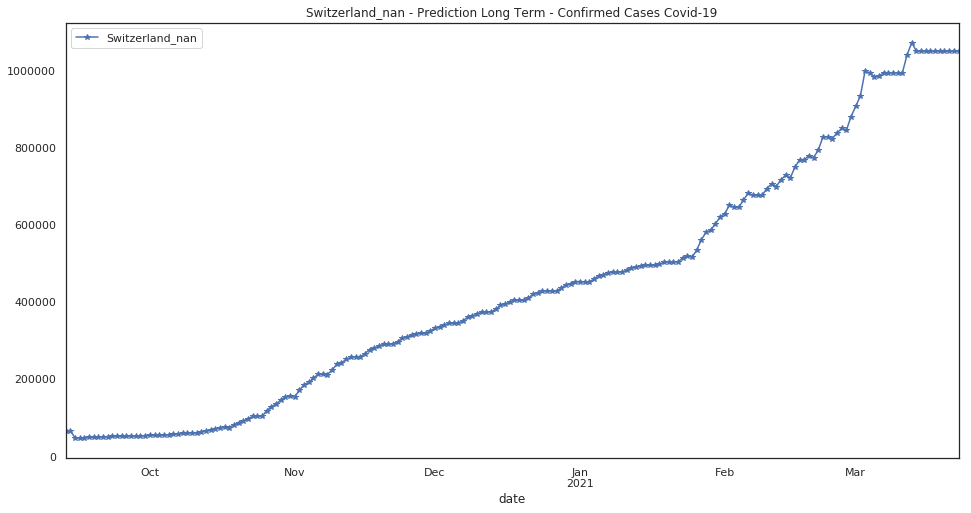

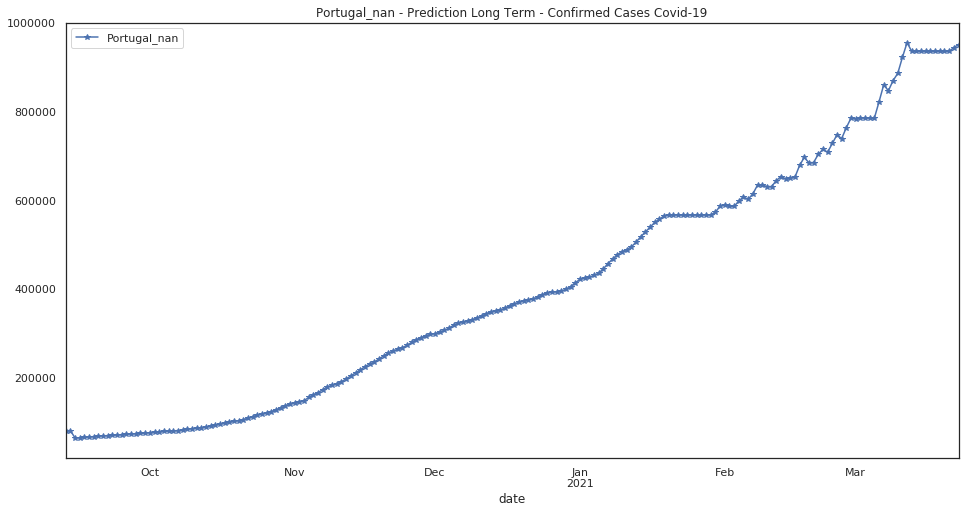

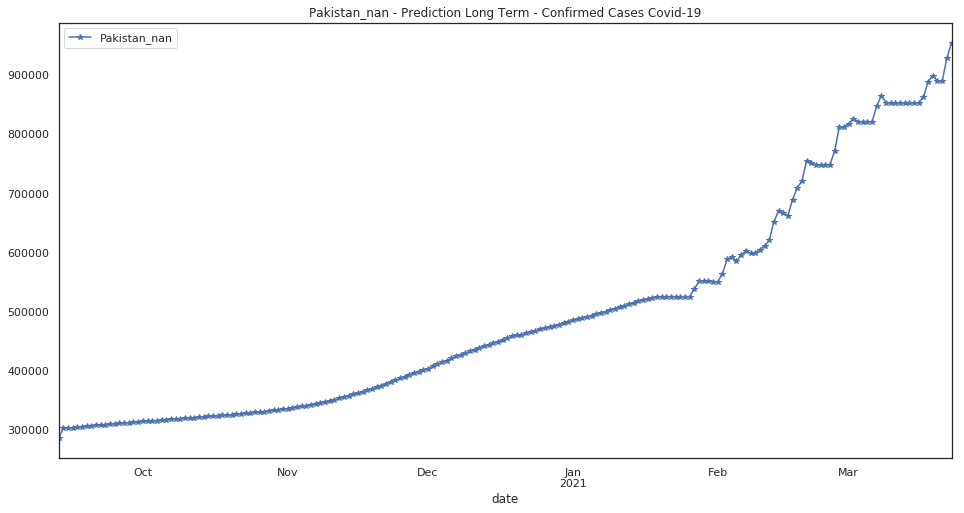

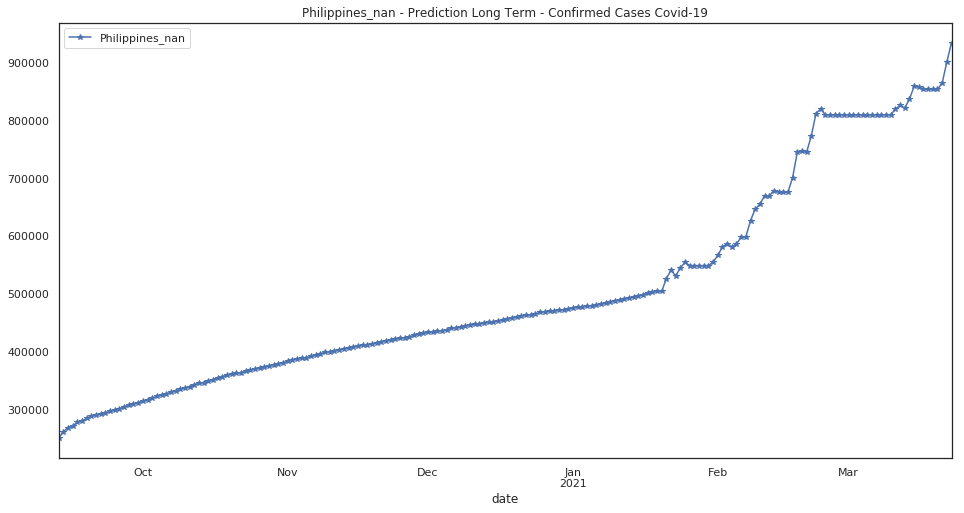

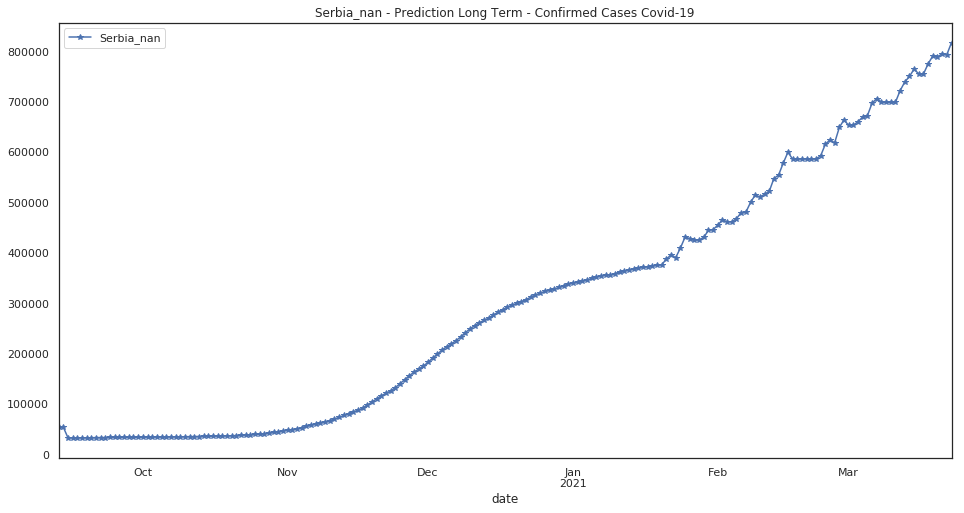

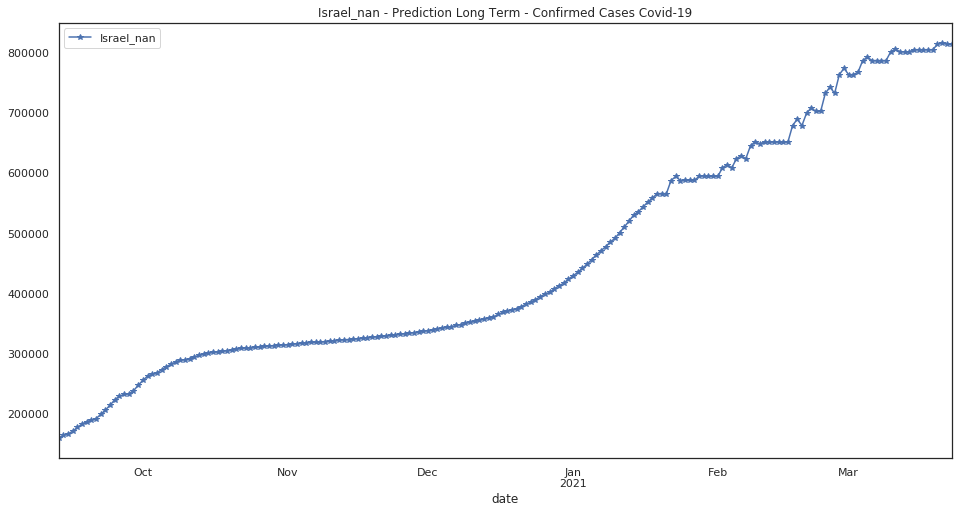

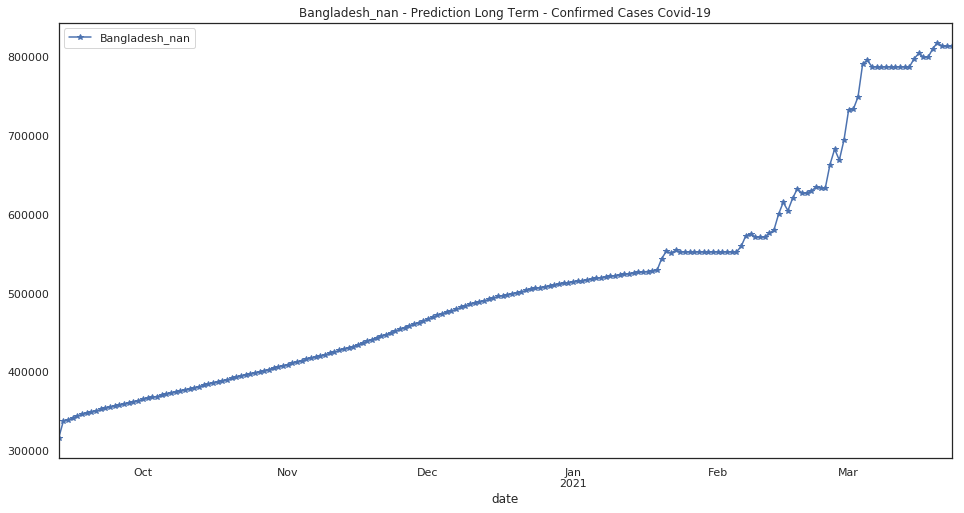

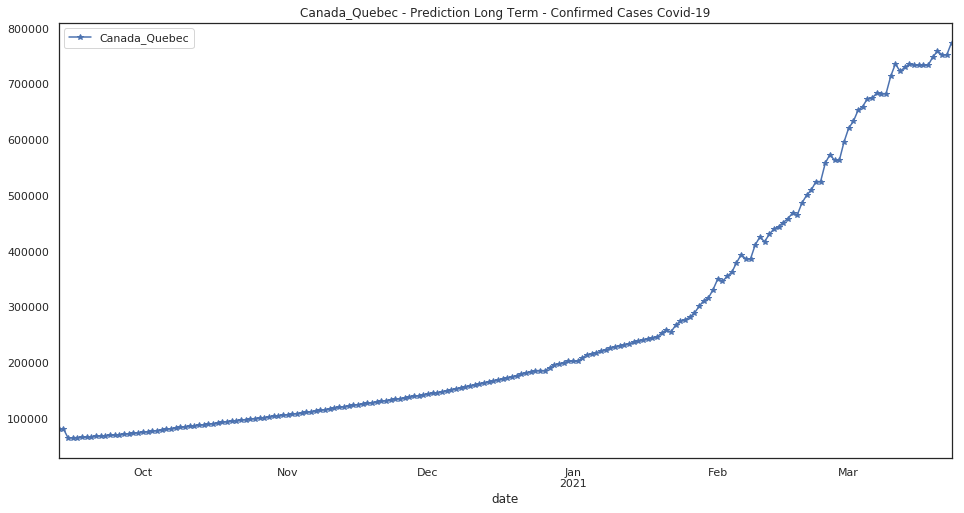

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

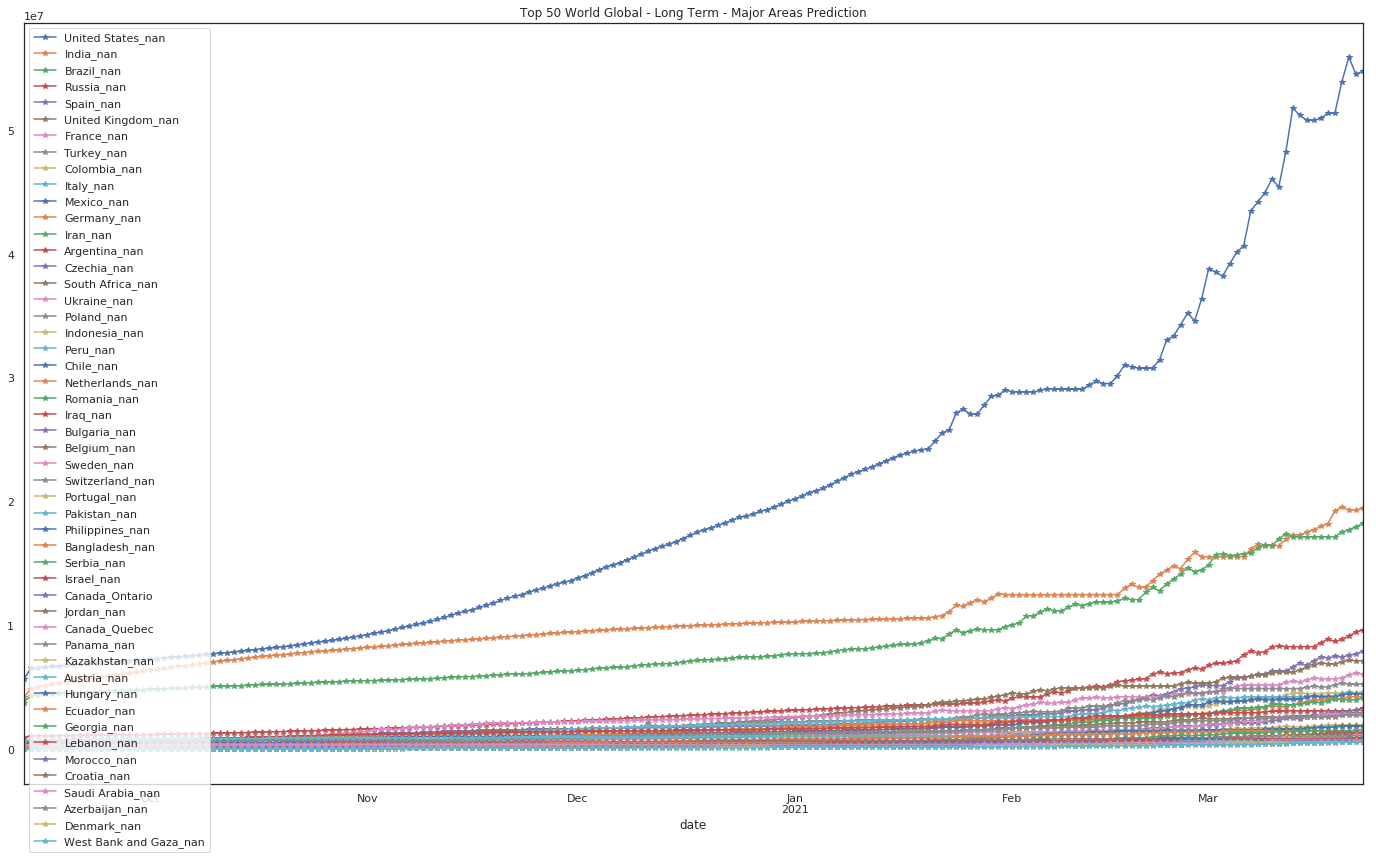

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

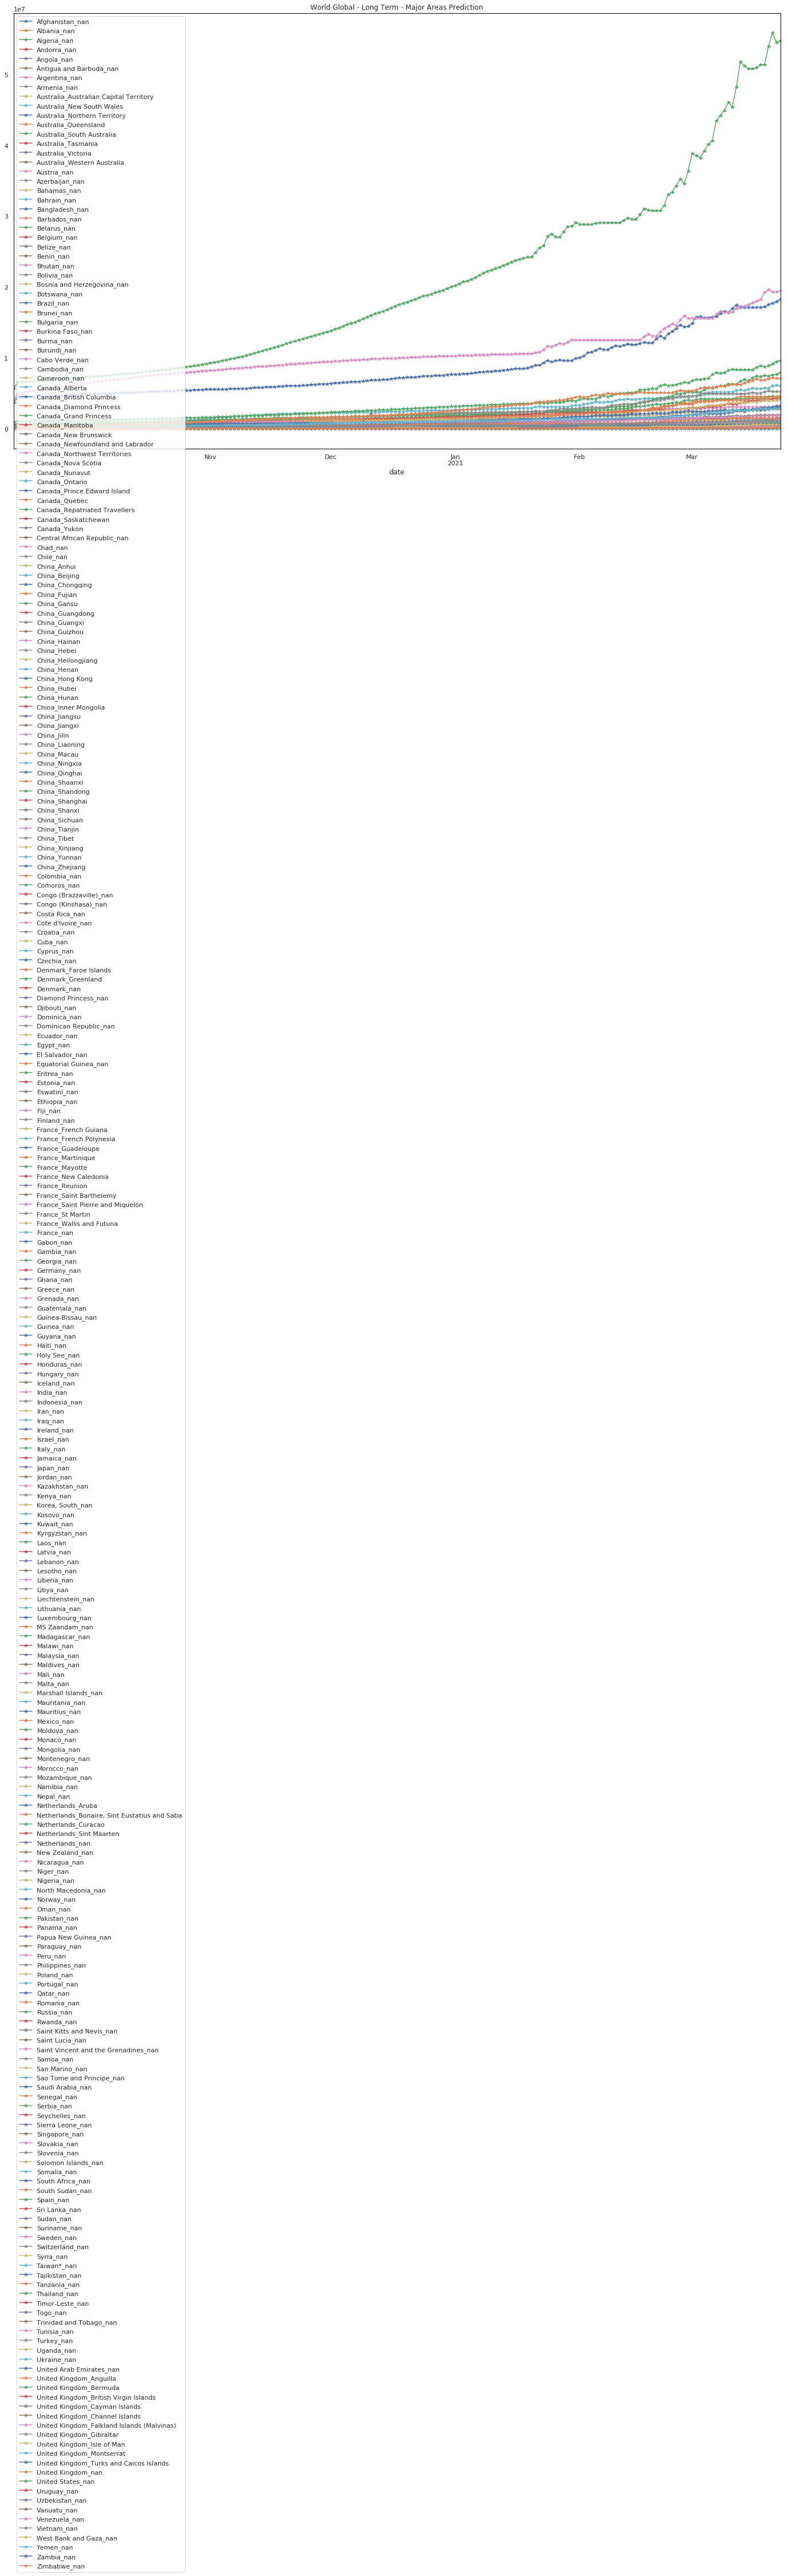

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41360.0      20035.0      57187.0       4410.0   
2020-10-29          41484.0      20294.0      57495.0       4517.0   
2020-10-30          41557.0      20642.0      57813.0       4589.0   
2020-10-31          41653.0      20861.0      58108.0       4665.0   
2020-11-01          41724.0      21241.0      58429.0       4756.0   
2020-11-02          41847.0      21496.0      58734.0       4825.0   
2020-11-03          41940.0      21877.0      59122.0       4888.0   
2020-11-04          42035.0      22240.0      59652.0       5032.0   
2020-11-05          42155.0      22656.0      60286.0       5045.0   
2020-11-06          42199.0      23130.0      60927.0       5135.0   
2020-11-07          42266.0      23586.0      61516.0       5420.0   
2020-11-08          42379.0      24094.0      62162.0       5319.0   
2020-11-09          42500.0      24623.0      62795.0       5383.0   
2020-11-10          42668.0      25169.0      63517.0       5437.0   
2020-11-11          42817.0      25669.0      64319.0       5477.0   
2020-11-12          43000.0      26132.0      65165.0       5567.0   
2020-11-13          43170.0      26663.0      66037.0       5616.0   
2020-11-14          43247.0      27136.0      66883.0       5725.0   
2020-11-15          43445.0      27706.0      67730.0       5901.0   
2020-11-16          43644.0      28295.0      68627.0       5872.0   
2020-11-17          43855.0      28990.0      69611.0       5914.0   
2020-11-18          44106.0      29671.0      70650.0       5951.0   
2020-11-19          44352.0      30452.0      71681.0       6018.0   
2020-11-20          44545.0      31262.0      72773.0       6066.0   
2020-11-21          44699.0      32003.0      73808.0       6142.0   
2020-11-22          44889.0      32639.0      74871.0       6207.0   
2020-11-23          45147.0      33456.0      75889.0       6256.0   
2020-11-24          45340.0      34112.0      76987.0       6304.0   
2020-11-25          45565.0      34795.0      78044.0       6351.0   
2020-11-26          45779.0      35500.0      79108.0       6428.0   
...                     ...          ...          ...          ...   
2021-02-22          70400.0     124824.0     152539.0      15273.0   
2021-02-23          71342.0     128321.0     152539.0      15901.0   
2021-02-24          71651.0     131093.0     158501.0      15901.0   
2021-02-25          72174.0     133425.0     161471.0      16087.0   
2021-02-26          73339.0     132714.0     159437.0      16731.0   
2021-02-27          73610.0     133405.0     159437.0      16731.0   
2021-02-28          76037.0     133405.0     159392.0      16731.0   
2021-03-01          76717.0     138159.0     164573.0      16731.0   
2021-03-02          77862.0     140627.0     167297.0      17053.0   
2021-03-03          78669.0     139601.0     165692.0      17053.0   
2021-03-04          81956.0     139601.0     165795.0      17053.0   
2021-03-05          83074.0     140439.0     169035.0      17053.0   
2021-03-06          82510.0     141070.0     170842.0      17053.0   
2021-03-07          85519.0     144020.0     169816.0      17053.0   
2021-03-08          86426.0     147347.0     169816.0      17053.0   
2021-03-09          89119.0     147306.0     169816.0      17696.0   
2021-03-10          90319.0     146900.0     174973.0      17884.0   
2021-03-11          89734.0     146944.0     177663.0      18314.0   
2021-03-12          89774.0     147359.0     175904.0      19119.0   
2021-03-13          89734.0     152818.0     175996.0      19309.0   
2021-03-14          91883.0     160313.0     179661.0      19766.0   
2021-03-15          95227.0     160868.0     183817.0      20670.0   
2021-03-16          95628.0     166940.0     183448.0      20859.0   
2021-03-17          95355.0     170394.0     185372.0      21815.0   
2021-03-18

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
248                                Thailand_nan  15.870032  100.992541   
249                             Timor-Leste_nan  -8.874217  125.727539   
250                                    Togo_nan   8.619500    0.824800   
251                     Trinidad and Tobago_nan  10.691800  -61.222500   
252                                 Tunisia_nan  33.886917    9.537499   
253                                  Turkey_nan  38.963700   35.243300   
254                           United States_nan  40.000000 -100.000000   
255                                  Uganda_nan   1.373333   32.290275   
256                                 Ukraine_nan  48.379400   31.165600   
257                    United Arab Emirates_nan  23.424076   53.847818   
258                     United Kingdom_Anguilla  18.220600  -63.068600   
259                      United Kingdom_Bermuda  32.307800  -64.750500   
260       United Kingdom_British Virgin Islands  18.420700  -64.640000   
261               United Kingdom_Cayman Islands  19.313300  -81.254600   
262              United Kingdom_Channel Islands  49.372300   -2.364400   
263  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
264                    United Kingdom_Gibraltar  36.140800   -5.353600   
265                  United Kingdom_Isle of Man  54.236100   -4.548100   
266                   United Kingdom_Montserrat  16.742498  -62.187366   
267     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
268                          United Kingdom_nan  55.378100   -3.436000   
269                                 Uruguay_nan -32.522800  -55.765800   
270                              Uzbekistan_n

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                  region        Lat        Long  2020-09-13 00:00:00  \
0       6           Argentina_nan -38.416100  -63.616700             503690.0   
1      16             Austria_nan  47.516200   14.550100              54131.0   
2      17          Azerbaijan_nan  40.143100   47.576900              58579.0   
3      20          Bangladesh_nan  23.685000   90.356300             316064.0   
4      23             Belgium_nan  50.833300    4.469936             106022.0   
5      30              Brazil_nan -14.235000  -51.925300            3752384.0   
6      32            Bulgaria_nan  42.733900   25.485800              41015.0   
7      51          Canada_Ontario  51.253800  -85.323200              65599.0   
8      53           Canada_Quebec  52.939900  -73.549100              81521.0   
9      59               Chile_nan -35.675100  -71.543000             399738.0   
10     93            Colombia_nan   4.570900  -74.297300             642059.0   
11     99             Croatia_nan  45.100000   15.200000              37241.0   
12    102             Czechia_nan  49.817500   15.473000              56738.0   
13    105             Denmark_nan  56.263900    9.501800              42712.0   
14    110             Ecuador_nan  -1.831200  -78.183400             127656.0   
15    131              France_nan  46.227600    2.213700             370293.0   
16    134             Georgia_nan  42.315400   43.356900              27511.0   
17    135             Georgia_nan  42.315400   43.356900              27511.0   
18    136             Germany_nan  51.165691   10.451526             250845.0   
19    148             Hungary_nan  47.162500   19.503300              36187.0   
20    150               India_nan  20.593684   78.962880            4196429.0   
21    151           Indonesia_nan  -0.789300  113.921300             213534.0   
22    152                Iran_nan  32.427908   53.688046             371581.0   
23    153                Iraq_nan  33.223191   43.679291             275434.0   
24    155              Israel_nan  31.046051   34.851612             160037.0   
25    156              Israel_nan  31.046051   34.851612             160037.0   
26    157               Italy_nan  41.871940   12.567380             273235.0   
27    160              Jordan_nan  31.240000   36.510000              28446.0   
28    161          Kazakhstan_nan  48.019600   66.923700             142966.0   
29    169             Lebanon_nan  33.854700   35.862300              46516.0   
30    170             Lebanon_nan  33.854700   35.862300              46516.0   
31    187              Mexico_nan  23.634500 -102.552800             600803.0   
32    192             Morocco_nan  31.791700   -7.092600             100196.0   
33    200         Netherlands_nan  52.132600    5.291300              96249.0   
34    208            Pakistan_nan  30.375300   69.345100             285513.0   
35    209              Panama_nan   8.538000  -80.782100             113156.0   
36    212                Peru_nan  -9.190000  -75.015200             647664.0   
37    213         Philippines_nan  12.879721  121.774017             250397.0   
38    214              Poland_nan  51.919400   19.145100              89410.0   
39    215            Portugal_nan  39.399900   -8.224500              80658.0   
40    217             Romania_nan  45.943200   24.966800             114662.0   
41    218              Russia_nan  61.524010  105.318756             936990.0   
42    226        Saudi Arabia_nan  23.885942   45.079162             305850.0   
43    228              Serbia_nan  44.016500   21.005900              53485.0   
44    236        South Africa_nan -30.559500   22.937500             584806.0   
45    238               Spain_nan  40.463667   -3.749220             512975.0   
46    242              Sweden_nan  60.128161   18.643501             100041.0   
47    243         Switzerland_nan  46.818200    8.227500              66197.0   
48    253              Turkey_nan  

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()